In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
%matplotlib inline

In [2]:
ddat = pd.read_csv(r"/Users/da-m1-40/Downloads/da.csv")

In [3]:
ddat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847544 entries, 0 to 847543
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CUSTOMER_IDENTIFIER       847544 non-null  object 
 1   DATE_LAST_UPDATED         847544 non-null  object 
 2   SEX_CODE                  847544 non-null  int64  
 3   INCOME_GROUP_CODE         847544 non-null  int64  
 4   NUMBER_OF_ACCOUNTS        847544 non-null  int64  
 5   OCCUPATIONAL_STATUS_CODE  847544 non-null  int64  
 6   AGE                       847544 non-null  int64  
 7   N_CUSTOMER_ID             847544 non-null  int64  
 8   income_group_code         847544 non-null  int64  
 9   income_group_desc         847544 non-null  object 
 10  TRANSACTION_DESCRIPTION   475339 non-null  object 
 11  RECORD_DATE               847544 non-null  object 
 12  ACCOUNT_TYPE_CODE         847544 non-null  object 
 13  ACCOUNT_BALANCE           847544 non-null  f

In [4]:
#Grouped_price = ddat.groupby(['N_CUSTOMER_ID','RECORD_DATE'])['N_CUSTOMER_ID'].count()
#print("Grouped data:\n",Grouped_price)


In [5]:
ddat['N_CUSTOMER_ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0            1
1            1
2            1
3            1
4            1
          ... 
847539    5085
847540    5085
847541    5085
847542    5085
847543    5085
Name: N_CUSTOMER_ID, Length: 847544, dtype: int64>

In [6]:
ddat.drop(columns= "CUSTOMER_IDENTIFIER", inplace=True)

In [7]:
ddat["INCOME_GROUP_CODE"].unique()

array([11, 14, 12, 15,  6,  9,  5,  8, 10,  7, 17, 16,  2, 13,  4, 19,  3,
       18,  1, 20, 21,  0])

In [8]:
ddat["NUMBER_OF_ACCOUNTS"].unique()

array([ 6,  7, 10, 13, 14,  5,  8,  9, 11, 12, 17, 16,  4,  2, 18, 15, 19,
        3, 24, 20, 21, 23, 22, 27, 25, 34, 26, 29, 38, 30, 28])

In [9]:
ddat["OCCUPATIONAL_STATUS_CODE"].unique()

array([1, 3, 7, 4, 2, 8, 6, 0, 9, 5])

In [10]:
ddat["AGE"].unique()

array([35, 56, 42, 43, 27, 30, 66, 67, 52, 50, 38, 53, 34, 33, 46, 51, 24,
       45, 36, 22, 32, 40, 31, 39, 41, 48, 37, 23, 54, 25, 28, 20, 47, 70,
       26, 21, 55, 19, 49, 29, 59, 63, 57, 44, 64, 18, 60, 58, 75, 61, 68,
       65, 74, 72, 76, 17, 62, 73, 16, 69, 79, 71, 81, 83, 80])

In [11]:
ddat["N_CUSTOMER_ID"].unique()

array([   1,    2,    5, ..., 4381, 3162, 5085])

In [12]:
ddat["TRANSACTION_DESCRIPTION"].unique()

array([nan, 'OPENED-FROM SAV', 'ATM WITHDRAWAL', 'BAD DEBT W/OFF',
       'MANAGEMENT FEE', 'CHARGES', 'CREDIT TRANSFER',
       'MANAGEMNT FEE CLSE', 'ACB CREDIT', 'INT DEBIT ORDER TO',
       'POS PURCHASE', 'REWARDS FEE', 'ACB DEBIT:INTERNAL',
       'DC TRACK EXTERNAL', 'DC TRACK INTERNAL', 'POS PUR & CASH',
       'OVERSEAS PURCHASE', 'DC INTERNAL', 'UNPAID DEBIT', 'DC UNPAID',
       'POS CASH WDL', 'ACB DEBIT:EXTERNAL', 'TRANSFER FROM',
       'CASHSEND ATM', 'DIGITAL TRAN FEES', 'CASHSEND DIGITAL',
       'DO INT DISP ONLNE', 'AIRTIME DEBIT', 'ACB EXT DISP ONLNE',
       'LOTTO PURCHASE', 'IBANK TRANSFER', 'DIGITAL PAYMENT DT',
       'CARDLESS CASH DEP', 'CASH ACCEPTOR DEP', 'IMDTE DIGITAL PMT',
       'IBANK PAYMENT FROM', 'LOTTO WINNINGS', 'ATM TRANSFER',
       'INVESTMENT CAPITAL', 'DIGITAL PAYMENT CR', 'TRI ATM WITHDRAWAL',
       'CASH WITHDRAWAL', 'IMMEDIATE TRF CR', 'PINP TELL CASH WDL',
       'NPF CREDIT', 'OD: INITIATION FEE', 'DC TRK EXT DSP ONL',
       'SSD OTHER

In [13]:
ddat["RECORD_DATE"].unique()

array(['2022-01-16 00:00:00+02:00', '2022-01-14 00:00:00+02:00',
       '2022-01-03 00:00:00+02:00', '2022-03-21 00:00:00+02:00',
       '2022-03-20 00:00:00+02:00', '2021-10-01 00:00:00+02:00',
       '2022-03-25 00:00:00+02:00', '2022-01-21 00:00:00+02:00',
       '2021-09-21 00:00:00+02:00', '2021-10-22 00:00:00+02:00',
       '2022-02-05 00:00:00+02:00', '2021-09-30 00:00:00+02:00',
       '2021-12-23 00:00:00+02:00', '2022-03-30 00:00:00+02:00',
       '2021-10-17 00:00:00+02:00', '2021-12-24 00:00:00+02:00',
       '2022-03-23 00:00:00+02:00', '2022-03-02 00:00:00+02:00',
       '2022-03-26 00:00:00+02:00', '2022-01-01 00:00:00+02:00',
       '2021-11-20 00:00:00+02:00', '2022-03-11 00:00:00+02:00',
       '2022-03-18 00:00:00+02:00', '2022-01-28 00:00:00+02:00',
       '2022-02-24 00:00:00+02:00', '2022-02-11 00:00:00+02:00',
       '2022-02-25 00:00:00+02:00', '2022-02-04 00:00:00+02:00',
       '2021-10-29 00:00:00+02:00', '2022-02-20 00:00:00+02:00',
       '2021-10-08 00:00:

In [14]:
ddat["ACCOUNT_TYPE_CODE"].unique

<bound method Series.unique of 0         e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...
1         e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...
2         e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...
3         e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...
4         e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...
                                ...                        
847539    b665ccce5a5c821c1a359029ae24ef2a63739b4f6b5b3a...
847540    b665ccce5a5c821c1a359029ae24ef2a63739b4f6b5b3a...
847541    b665ccce5a5c821c1a359029ae24ef2a63739b4f6b5b3a...
847542    b665ccce5a5c821c1a359029ae24ef2a63739b4f6b5b3a...
847543    b665ccce5a5c821c1a359029ae24ef2a63739b4f6b5b3a...
Name: ACCOUNT_TYPE_CODE, Length: 847544, dtype: object>

In [15]:
ddat["AMT"].unique

<bound method Series.unique of 0        -950.00
1         -50.00
2        -340.00
3        -200.00
4        -100.00
           ...  
847539      0.06
847540      0.06
847541      0.06
847542      0.06
847543      0.07
Name: AMT, Length: 847544, dtype: float64>

In [16]:
ddat["EVENT_NUMBER"].unique

<bound method Series.unique of 0         1489
1         1486
2         1478
3         1577
4         1575
          ... 
847539      72
847540      75
847541      73
847542      78
847543      77
Name: EVENT_NUMBER, Length: 847544, dtype: int64>

In [17]:
ddat["PRODUCT_CODE"].unique()

array(['SAVE', 'CHEQ'], dtype=object)

In [18]:
ddat["CHANNEL"].unique()

array(['atm', 'system', 'internet', 'teller'], dtype=object)

In [19]:
ddat["ACCOUNT_NUMBER"].unique

<bound method Series.unique of 0         eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...
1         eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...
2         eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...
3         eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...
4         eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...
                                ...                        
847539    103e213962f8b80460e5a69e25ecce5b4026e89e974036...
847540    103e213962f8b80460e5a69e25ecce5b4026e89e974036...
847541    103e213962f8b80460e5a69e25ecce5b4026e89e974036...
847542    103e213962f8b80460e5a69e25ecce5b4026e89e974036...
847543    103e213962f8b80460e5a69e25ecce5b4026e89e974036...
Name: ACCOUNT_NUMBER, Length: 847544, dtype: object>

In [20]:
ddat.head(150)

,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,RECORD_DATE,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE
0,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-16 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,48.07,-950.0,1489,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
1,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-14 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,1550.57,-50.0,1486,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
2,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-03 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,84.97,-340.0,1478,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
3,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-03-21 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,246.98,-200.0,1577,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
4,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-03-20 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,454.98,-100.0,1575,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2021-09-17 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,61.15,-750.0,1362,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
146,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-03-30 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,18.53,-20.0,1598,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
147,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2021-12-21 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,6.07,-10.0,1465,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN
148,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-07 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,47.87,-1600.0,1482,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN


In [21]:
ddat["TRANSACTION_REFERENCE"].unique()

array([nan,
       'f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd70f5f15b4886cc339275ff553fc8a053f8ddc7324f45168cffaf81f8c3ac93996f6536eef38e5e40768',
       '445a2a0209a08f1950f41c9c2ad627f468f4d9a40220e441a0258f1afaef0a52e9bd0f759a037b8d0a8deffab709e25673bff5522873edb87d06f71e2d010ffa',
       ...,
       '80f25d1b2020bc09db74533434ef5235331e1e8184b1162831105f3c68b2977541e1d7b862219e5090d5bee30d6e307659a4383945c5680647082e691f3ed760',
       'aefa88e198f4e1fb1a7561db3e2ce9ec07a062b64501e5bf38ac32cd80b84b1b38f940eebaf94f567aa538d33d592841891da92f35156dca801e87879a379d52',
       'a5c960f582e287d5a70b96ca50185ea0bdaa6a046e6d9de2c881e5705fc07fb5ee657204bde9dd1c3da1e3b5e36f991fd3a6df526db019b27a999ff7f3d26a7b'],
      dtype=object)

In [22]:
ddat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847544 entries, 0 to 847543
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DATE_LAST_UPDATED         847544 non-null  object 
 1   SEX_CODE                  847544 non-null  int64  
 2   INCOME_GROUP_CODE         847544 non-null  int64  
 3   NUMBER_OF_ACCOUNTS        847544 non-null  int64  
 4   OCCUPATIONAL_STATUS_CODE  847544 non-null  int64  
 5   AGE                       847544 non-null  int64  
 6   N_CUSTOMER_ID             847544 non-null  int64  
 7   income_group_code         847544 non-null  int64  
 8   income_group_desc         847544 non-null  object 
 9   TRANSACTION_DESCRIPTION   475339 non-null  object 
 10  RECORD_DATE               847544 non-null  object 
 11  ACCOUNT_TYPE_CODE         847544 non-null  object 
 12  ACCOUNT_BALANCE           847544 non-null  float64
 13  AMT                       847544 non-null  f

In [23]:
ddat.describe().T

,count,mean,std,min,25%,50%,75%,max
SEX_CODE,847544.0,0.427562,0.494725,0.00,0.0000,0.000,1.0000,1.00
INCOME_GROUP_CODE,847544.0,12.183651,3.879791,0.00,9.0000,13.000,15.0000,21.00
NUMBER_OF_ACCOUNTS,847544.0,10.947900,4.533870,2.00,8.0000,10.000,14.0000,38.00
OCCUPATIONAL_STATUS_CODE,847544.0,1.403076,1.455279,0.00,1.0000,1.000,1.0000,9.00
AGE,847544.0,36.150941,10.460303,16.00,28.0000,34.000,43.0000,83.00
N_CUSTOMER_ID,847544.0,2578.559473,1475.212109,1.00,1293.0000,2569.000,3854.0000,5144.00
income_group_code,847544.0,12.183651,3.879791,0.00,9.0000,13.000,15.0000,21.00
ACCOUNT_BALANCE,847544.0,5267.905511,6949.438819,-2499.97,693.1675,2591.815,7065.0475,49974.68
AMT,847544.0,12.387409,3054.419311,-90000.00,-400.0000,-120.000,-29.0000,51027.04
EVENT_NUMBER,847544.0,6378.685024,7172.905368,2.00,1398.0000,4026.000,8925.0000,51901.00


In [24]:
ddat.describe(include='object').T

,count,unique,top,freq
DATE_LAST_UPDATED,847544,9,Aug-22,311247
income_group_desc,847544,22,"R15,000 - 19,999",131996
TRANSACTION_DESCRIPTION,475339,128,POS PURCHASE,176520
RECORD_DATE,847544,427,2022-03-01 00:00:00+02:00,9847
ACCOUNT_TYPE_CODE,847544,19,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,411323
PRODUCT_CODE,847544,2,CHEQ,475339
CHANNEL,847544,4,system,509581
ACCOUNT_NUMBER,847544,5587,5040d91a6903cb5afe5f7b314a26f070601dc8bd78b990...,2218
TRANSACTION_REFERENCE,475339,136699,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,50365


In [25]:
ddat.isnull().sum()

DATE_LAST_UPDATED                0
SEX_CODE                         0
INCOME_GROUP_CODE                0
NUMBER_OF_ACCOUNTS               0
OCCUPATIONAL_STATUS_CODE         0
AGE                              0
N_CUSTOMER_ID                    0
income_group_code                0
income_group_desc                0
TRANSACTION_DESCRIPTION     372205
RECORD_DATE                      0
ACCOUNT_TYPE_CODE                0
ACCOUNT_BALANCE                  0
AMT                              0
EVENT_NUMBER                     0
PRODUCT_CODE                     0
CHANNEL                          0
ACCOUNT_NUMBER                   0
TRANSACTION_REFERENCE       372205
dtype: int64

In [26]:
import pandas as pd

# Define the bins and labels for age groups
bins = [0, 50, 75, 100]  # Define age group boundaries
labels = ['16-35', '36-55', '66+']  # Define labels for age groups

# Use pd.cut() to create a new column 'Age Group' with age categories
# 'right=False' specifies left-closed intervals
ddat['Age Group'] = pd.cut(ddat['AGE'], bins=bins, labels=labels, right=False)



In [27]:
ddat.head()

,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,RECORD_DATE,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,Age Group
0,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-16 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,48.07,-950.0,1489,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35
1,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-14 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,1550.57,-50.0,1486,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35
2,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-01-03 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,84.97,-340.0,1478,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35
3,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-03-21 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,246.98,-200.0,1577,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35
4,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,2022-03-20 00:00:00+02:00,e17913461e7c03cd0f2c1ac41584dcd801cb32e7f86ad9...,454.98,-100.0,1575,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35


In [28]:
ddat['AGE'].unique()

array([35, 56, 42, 43, 27, 30, 66, 67, 52, 50, 38, 53, 34, 33, 46, 51, 24,
       45, 36, 22, 32, 40, 31, 39, 41, 48, 37, 23, 54, 25, 28, 20, 47, 70,
       26, 21, 55, 19, 49, 29, 59, 63, 57, 44, 64, 18, 60, 58, 75, 61, 68,
       65, 74, 72, 76, 17, 62, 73, 16, 69, 79, 71, 81, 83, 80])

In [29]:

ddat['datetime_column'] = pd.to_datetime(ddat['RECORD_DATE'])  # Convert to datetime dtype
#df['datetime_column'] = pd.to_datetime(df['datetime_column'])  # Convert to datetime dtype

# Extract year, month, day, weekday
ddat['year'] = ddat['datetime_column'].dt.strftime('%Y') 
ddat['month'] = ddat['datetime_column'].dt.strftime('%B')
ddat['day'] = ddat['datetime_column'].dt.strftime('%A')
ddat['month_day'] = ddat['datetime_column'].dt.day


In [30]:
ddat.head()

,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,Age Group,datetime_column,year,month,day,month_day
0,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-01-16 00:00:00+02:00,2022,January,Sunday,16
1,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-01-14 00:00:00+02:00,2022,January,Friday,14
2,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-01-03 00:00:00+02:00,2022,January,Monday,3
3,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-03-21 00:00:00+02:00,2022,March,Monday,21
4,Sep-22,0,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-03-20 00:00:00+02:00,2022,March,Sunday,20


In [31]:
ddat['SEX_CODE'].replace({0: 'male', 1: 'female'}, inplace=True)

In [32]:
ddat.head()

,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,Age Group,datetime_column,year,month,day,month_day
0,Sep-22,male,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-01-16 00:00:00+02:00,2022,January,Sunday,16
1,Sep-22,male,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-01-14 00:00:00+02:00,2022,January,Friday,14
2,Sep-22,male,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-01-03 00:00:00+02:00,2022,January,Monday,3
3,Sep-22,male,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-03-21 00:00:00+02:00,2022,March,Monday,21
4,Sep-22,male,11,6,1,35,1,11,"R9,000 - 9,999",NaN,...,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,16-35,2022-03-20 00:00:00+02:00,2022,March,Sunday,20


In [33]:
ddat.rename(columns={'SEX_CODE': 'GENDER'}, inplace=True)

In [34]:
file_path = '/Users/da-m1-40/Downloads/data8.csv'

# Save the DataFrame to the specified CSV file path
ddat.to_csv(file_path, index=False)

In [35]:
data8 = pd.read_csv(r"/Users/da-m1-40/Downloads/data9.csv")

In [36]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847544 entries, 0 to 847543
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DATE_LAST_UPDATED         847544 non-null  object 
 1   GENDER                    847544 non-null  object 
 2   INCOME_GROUP_CODE         847544 non-null  int64  
 3   NUMBER_OF_ACCOUNTS        847544 non-null  int64  
 4   OCCUPATIONAL_STATUS_CODE  847544 non-null  int64  
 5   AGE                       847544 non-null  object 
 6   N_CUSTOMER_ID             847544 non-null  int64  
 7   income_group_code         847544 non-null  int64  
 8   income_group_desc         847544 non-null  object 
 9   TRANSACTION_DESCRIPTION   475339 non-null  object 
 10  RECORD_DATE               847544 non-null  object 
 11  ACCOUNT_TYPE_CODE         847544 non-null  object 
 12  ACCOUNT_BALANCE           847544 non-null  float64
 13  AMT                       847544 non-null  f

## Are there any outliers or anomalies in the data that need further investigation?

In [37]:
data8.isnull().sum()

DATE_LAST_UPDATED                0
GENDER                           0
INCOME_GROUP_CODE                0
NUMBER_OF_ACCOUNTS               0
OCCUPATIONAL_STATUS_CODE         0
AGE                              0
N_CUSTOMER_ID                    0
income_group_code                0
income_group_desc                0
TRANSACTION_DESCRIPTION     372205
RECORD_DATE                      0
ACCOUNT_TYPE_CODE                0
ACCOUNT_BALANCE                  0
AMT                              0
EVENT_NUMBER                     0
PRODUCT_CODE                     0
CHANNEL                          0
ACCOUNT_NUMBER                   0
TRANSACTION_REFERENCE       372205
datetime_column                  0
year                             0
month                            0
day                              0
Ocupational Description          0
dtype: int64

TRANSACTION_DESCRIPTION and TRANSACTION_REFERENCE these two columns have null values but they are not going to be dropped. 

In [38]:
dt =pd.crosstab(index=data8['TRANSACTION_DESCRIPTION'], columns=data8['CHANNEL'], normalize='index')
dt

CHANNEL,atm,internet,system,teller
TRANSACTION_DESCRIPTION,,,,
ACB CREDIT,0.0,0.0,1.000000,0.000000
ACB DEBIT REVERSAL,0.0,0.0,1.000000,0.000000
ACB DEBIT:EXTERNAL,0.0,0.0,1.000000,0.000000
ACB DEBIT:INTERNAL,0.0,0.0,1.000000,0.000000
ACB EXT DISP ONLNE,0.0,0.0,1.000000,0.000000
...,...,...,...,...
TRF TO CLOSE COR,0.0,0.0,0.000000,1.000000
TRI ATM WITHDRAWAL,1.0,0.0,0.000000,0.000000
UNPAID DEBIT,0.0,0.0,0.966055,0.033945


In [39]:
we =pd.crosstab(index=data8['income_group_desc'], columns=data8['GENDER'], normalize= False)
we

GENDER,female,male
income_group_desc,,
NOT SUPPLIED,129,7
R 0 - 499,7280,7714
"R1,000 - 1,999",6154,2165
"R10,000 - 11,999",23691,45970
"R12,000 - 14,999",32998,51210
"R125,000+",4,113
"R15,000 - 19,999",63484,68512
"R2,000 - 2,999",3462,2427
"R20,000 - 24,999",44299,60794


## How do demographic characteristics vary across different income groups?

<Axes: xlabel='income_group_desc'>

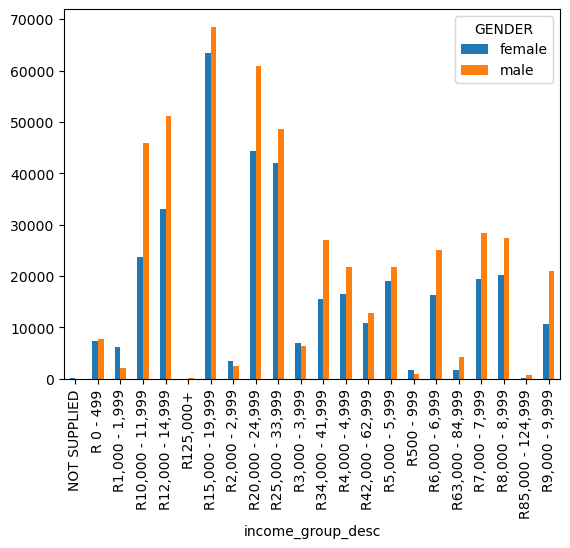

In [40]:
we.plot(kind="bar")

## How does the number of accounts vary across different demographic groups?

In [41]:
wer =pd.crosstab(index=data8['income_group_desc'], columns=data8['AGE'], normalize= False)


<Axes: xlabel='income_group_desc'>

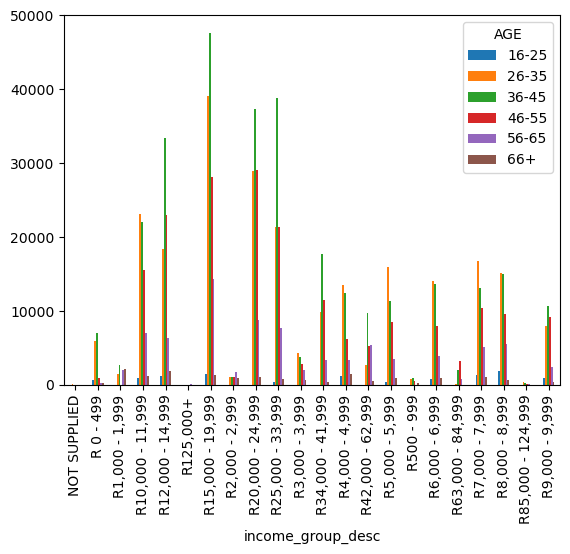

In [42]:
wer.plot(kind="bar")

## What channels are most commonly used by customers for transactions, and does this vary by demographic group?

In [43]:
wert =pd.crosstab(index=data8.CHANNEL, columns =[data8.TRANSACTION_DESCRIPTION,data8.GENDER],  normalize= False)
wert

TRANSACTION_DESCRIPTION ACB CREDIT        ACB DEBIT REVERSAL       \
GENDER                      female   male             female male   
CHANNEL                                                             
atm                              0      0                  0    0   
internet                         0      0                  0    0   
system                        8217  10424                 83  119   
teller                           0      0                  0    0   

TRANSACTION_DESCRIPTION ACB DEBIT:EXTERNAL        ACB DEBIT:INTERNAL       \
GENDER                              female   male             female male   
CHANNEL                                                                     
atm                                      0      0                  0    0   
internet                                 0      0                  0    0   
system                               10283  11017                411  433   
teller                                   0      0                  0    0   

TRANSACTION_DESCRIPTION ACB EXT DISP ONLNE       ... TRAVEL FOREX(TFC)  \
GENDER                              female male  ...              male   
CHANNEL                                          ...                     
atm                                      0    0  ...                 0   
internet                                 0    0  ...                 0   
system                                 218  278  ...                 0   
teller                                   0    0  ...                 1   

TRANSACTION_DESCRIPTION TRF TO CLOSE COR TRI ATM WITHDRAWAL        \
GENDER                              male             female  male   
CHANNEL                                                             
atm                                    0                557  1002   
internet                               0                  0     0   
system                                 0                  0     0   
teller                                 1                  0     0   

TRANSACTION_DESCRIPTION UNPAID DEBIT       WESTERN UNION(CBI)       \
GENDER                        female  male             female male   
CHANNEL                                                              
atm                                0     0                  0    0   
internet                           0     0                  0    0   
system                           858  1618                  0    0   
teller                            18    69                  3    1   

TRANSACTION_DESCRIPTION WESTERN UNION(CBO)       
GENDER                              female male  
CHANNEL                                          
atm                                      0    0  
internet                                 0    0  
system                                   0    0  
teller                                   3    1  

[4 rows x 239 columns]

## what is the age distrubution in the dataset?

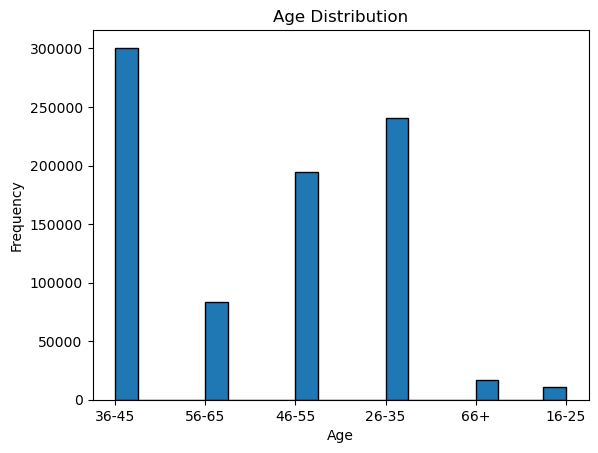

In [44]:
plt.hist(data8['AGE'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Which gender dominate when it comes to number of accounts?

In [45]:
weq= pd.crosstab(index= data8["CHANNEL"], columns =data8["GENDER"], normalize= False)
weq

weq['Sum'] = weq.sum(axis=1)

we = weq.sort_values(by='Sum', ascending=True)

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/table.py:809: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


<Figure size 2000x2000 with 0 Axes>

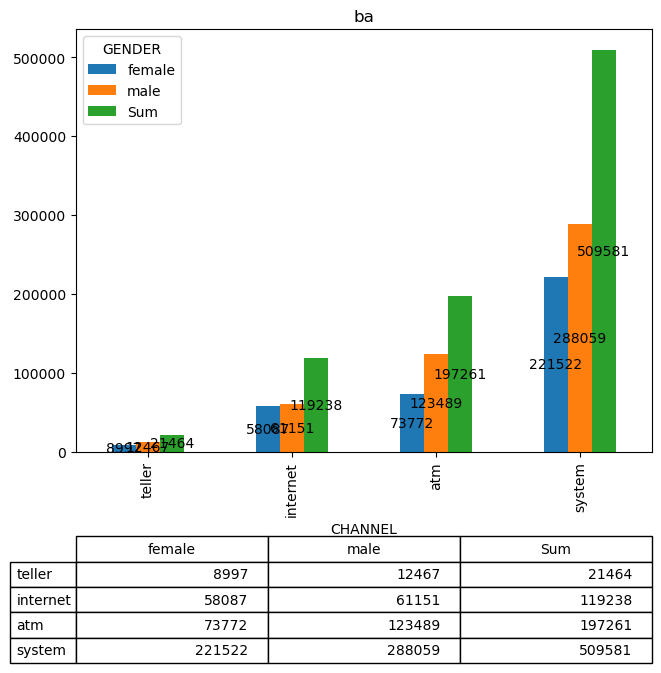

In [46]:
plt.figure(figsize=(20,20))
ax= we.plot(kind="bar", title="ba")

# Adding labels to each segment using bar_label
for container in ax.containers:
    ax.bar_label(container, label_type='center')
    
    
cell_text = []
for row in range(len(we)):
    cell_text.append(we.iloc[row])

# Add table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      colLabels=we.columns.tolist(),
                      rowLabels=we.index.tolist(),
                      loc='bottom',
                      bbox=[0, -0.5, 1, 0.3])  # 

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.0, bottom=0.0)

plt.show()

## Which age group dominate when it comes to number of accounts?

In [47]:
yt =pd.crosstab(index =data8["NUMBER_OF_ACCOUNTS"], columns =data8["GENDER"])
yt

GENDER,female,male
NUMBER_OF_ACCOUNTS,,
2,780,516
3,3182,3648
4,7560,12130
5,20476,20335
6,24978,34665
7,29727,42493
8,39512,49423
9,32201,45984
10,33178,41502


<Figure size 3000x2000 with 0 Axes>

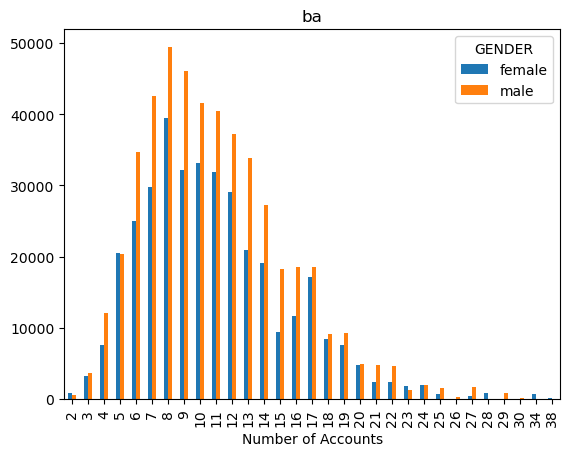

In [48]:
plt.figure(figsize=(30,20))
ax= yt.plot(kind="bar", title="ba", xlabel= "Number of Accounts")

# # Adding labels to each segment using bar_label
# for container in ax.containers:
#     ax.bar_label(container, label_type='center')
    
    
# cell_text = []
# for row in range(len(yt)):
#     cell_text.append(yt.iloc[row])

# # Add table at the bottom of the axes
# the_table = plt.table(cellText=cell_text,
#                       colLabels=yt.columns.tolist(),
#                       rowLabels=yt.index.tolist(),
#                       loc='bottom',
#                       bbox=[0, -0.5, 1, 0.3])  # 

# # Adjust layout to make room for the table:
# plt.subplots_adjust(left=0.0, bottom=0.0)

# plt.show()

## Which transaction is commonly used by each age group?

In [49]:
qw =pd.crosstab(index =data8.AGE, columns =data8.CHANNEL)
qw

CHANNEL,atm,internet,system,teller
AGE,,,,
16-25,2266,1907,6724,302
26-35,52054,40047,142082,6541
36-45,71827,44256,177059,7465
46-55,48450,22812,119017,4168
56-65,19121,8763,53487,2254
66+,3543,1453,11212,734


## Which transaction channel(atm, internet, system) is most common used by each gender?


<Axes: xlabel='AGE Group', ylabel='CHANNELS'>

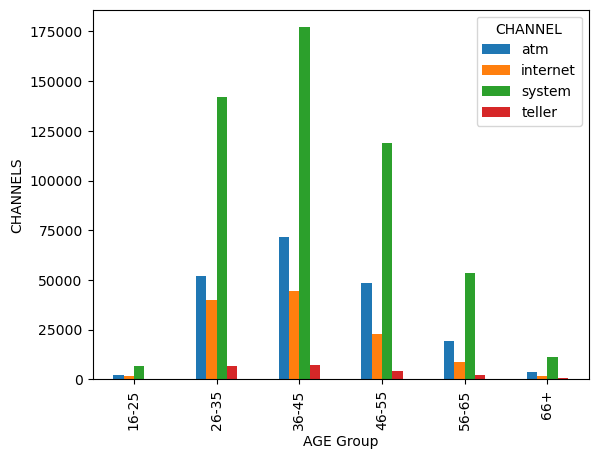

In [50]:
qw.plot(kind="bar", xlabel= "AGE Group", ylabel ="CHANNELS")

## Which age group dominate when it comes to income group?

In [51]:
rt = pd.crosstab(index =data8.income_group_desc, columns=data8.AGE)
rt

AGE,16-25,26-35,36-45,46-55,56-65,66+
income_group_desc,,,,,,
NOT SUPPLIED,0,129,7,0,0,0
R 0 - 499,628,5911,7018,983,195,259
"R1,000 - 1,999",0,1427,2670,38,1985,2199
"R10,000 - 11,999",924,23107,22002,15480,7011,1137
"R12,000 - 14,999",1217,18347,33409,22943,6395,1897
"R125,000+",0,0,2,37,78,0
"R15,000 - 19,999",1482,39059,47648,28069,14353,1385
"R2,000 - 2,999",0,1073,1096,1071,1787,862
"R20,000 - 24,999",38,28910,37309,29097,8740,999


<Axes: xlabel='income_group_desc'>

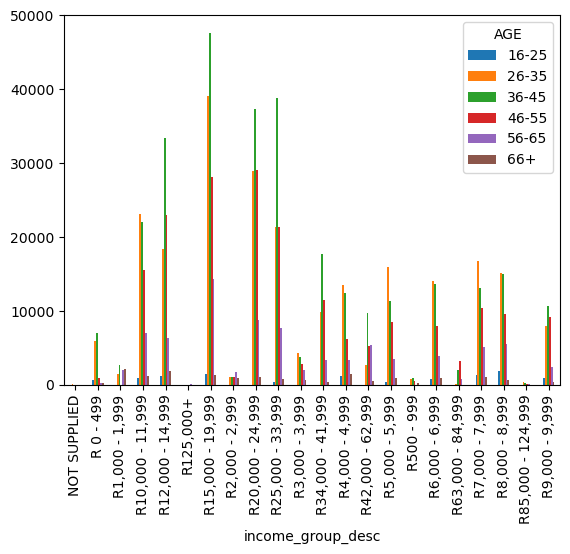

In [52]:
rt.plot(kind="bar")

## Which genders have identical occupational statuses?


In [53]:
uj =pd.crosstab(index =data8.OCCUPATIONAL_STATUS_CODE, columns =data8.GENDER)
uj

GENDER,female,male
OCCUPATIONAL_STATUS_CODE,,
0,0,3
1,321813,450463
2,6850,5922
3,3542,7757
4,2622,0
5,51,28
6,2037,1782
7,22214,13476
8,2058,4973


<Axes: xlabel='OCCUPATIONAL_STATUS_CODE'>

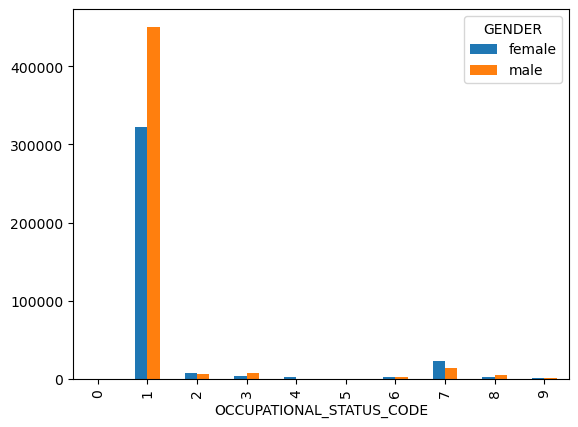

In [54]:
uj.plot(kind ="bar")

In [55]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847544 entries, 0 to 847543
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   DATE_LAST_UPDATED         847544 non-null  object 
 1   GENDER                    847544 non-null  object 
 2   INCOME_GROUP_CODE         847544 non-null  int64  
 3   NUMBER_OF_ACCOUNTS        847544 non-null  int64  
 4   OCCUPATIONAL_STATUS_CODE  847544 non-null  int64  
 5   AGE                       847544 non-null  object 
 6   N_CUSTOMER_ID             847544 non-null  int64  
 7   income_group_code         847544 non-null  int64  
 8   income_group_desc         847544 non-null  object 
 9   TRANSACTION_DESCRIPTION   475339 non-null  object 
 10  RECORD_DATE               847544 non-null  object 
 11  ACCOUNT_TYPE_CODE         847544 non-null  object 
 12  ACCOUNT_BALANCE           847544 non-null  float64
 13  AMT                       847544 non-null  f

## Which age brackets share identical occupational statuses?

In [56]:
data8.rename(columns={'Ocupational Description': 'Ocupational_Description'}, inplace=True)

In [57]:
bv =pd.crosstab(index =data8.Ocupational_Description, columns =data8.AGE)
bv

AGE,16-25,26-35,36-45,46-55,56-65,66+
Ocupational_Description,,,,,,
"Armed forces, occupations unspecified and not elsewhere classified and not economically active persons",0,3,0,0,0,0
Clerks,2,20,497,1201,777,125
Craft and related trades workers,0,0,1721,3382,16000,14587
Elementary occupations,0,583,1019,57,294,0
"Legislators, senior officials and managers",9319,229619,287458,181995,61923,1962
Plant and machinery operators and assemblers,522,3997,1571,310,630,1
Professionals,0,3146,4113,4014,1327,172
Service workers and shop and market sales workers,0,59,20,0,0,0
Skilled agricultural and fishery workers,620,866,1668,326,269,70


<Axes: xlabel='Ocupational_Description'>

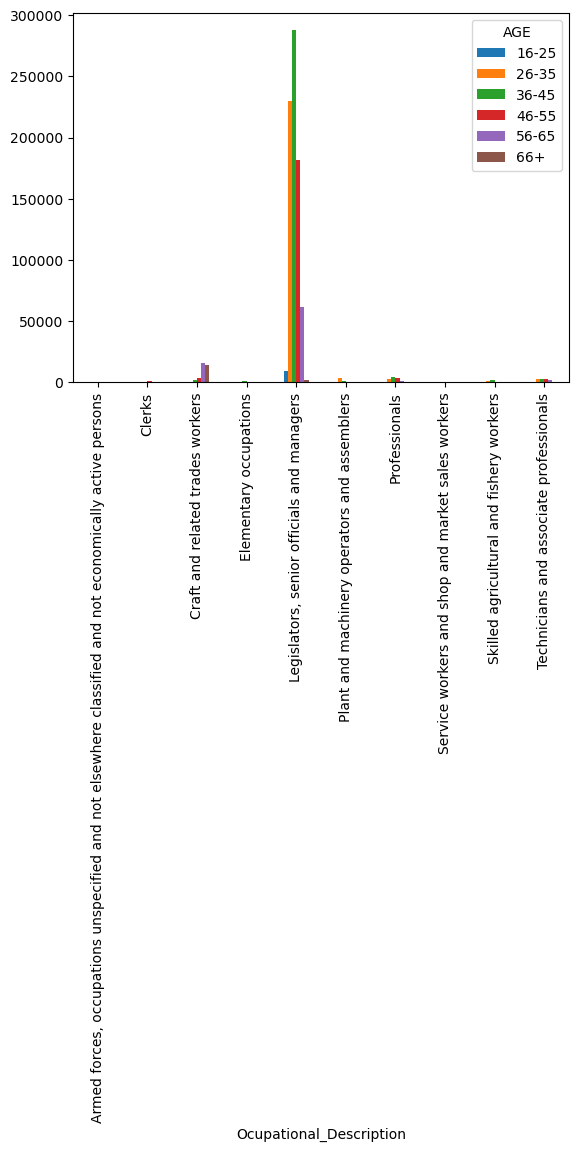

In [58]:
bv.plot(kind ="bar")

In [59]:
data8.head()

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
0,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",NaN,...,1489,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-16 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
1,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",NaN,...,1486,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-14 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"
2,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",NaN,...,1478,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-03 00:00:00+02:00,2022,January,Monday,"Legislators, senior officials and managers"
3,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",NaN,...,1577,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-21 00:00:00+02:00,2022,March,Monday,"Legislators, senior officials and managers"
4,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",NaN,...,1575,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-20 00:00:00+02:00,2022,March,Sunday,"Legislators, senior officials and managers"


In [60]:
custom_sort_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day' column to categorical with custom sorting order
data8['day'] = pd.Categorical(data8['day'], categories=custom_sort_order, ordered=True)

# Create the pivot table
tq = pd.pivot_table(data8, 
                    index="day", 
                    columns="CHANNEL", 
                    values="AMT", 
                    aggfunc=np.sum)

# Display the pivot table
tq

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/3758231769.py:7: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tq = pd.pivot_table(data8,


CHANNEL,atm,internet,system,teller
day,,,,
Monday,-10911902.50,-4755777.21,26316084.54,10265714.71
Tuesday,-12085030.42,-5768497.29,1757848.17,10305412.36
Wednesday,-12284386.33,-4706539.71,6652503.54,10561592.94
Thursday,-14155970.28,-3032514.83,32407085.90,9674476.68
Friday,-22275189.20,-3555141.81,42426613.47,13432115.35
Saturday,-16666509.30,-4438604.44,-15344841.29,5960593.49
Sunday,-8554408.75,-2811651.10,-19404792.77,1490590.26


<Axes: xlabel='day'>

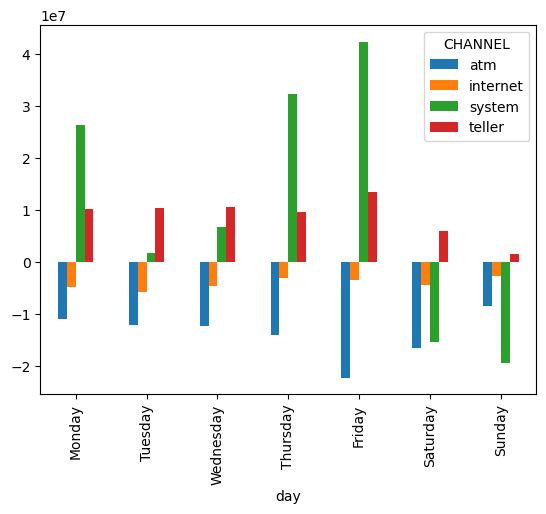

In [61]:
tq.plot(kind ="bar")

In [62]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847544 entries, 0 to 847543
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   DATE_LAST_UPDATED         847544 non-null  object  
 1   GENDER                    847544 non-null  object  
 2   INCOME_GROUP_CODE         847544 non-null  int64   
 3   NUMBER_OF_ACCOUNTS        847544 non-null  int64   
 4   OCCUPATIONAL_STATUS_CODE  847544 non-null  int64   
 5   AGE                       847544 non-null  object  
 6   N_CUSTOMER_ID             847544 non-null  int64   
 7   income_group_code         847544 non-null  int64   
 8   income_group_desc         847544 non-null  object  
 9   TRANSACTION_DESCRIPTION   475339 non-null  object  
 10  RECORD_DATE               847544 non-null  object  
 11  ACCOUNT_TYPE_CODE         847544 non-null  object  
 12  ACCOUNT_BALANCE           847544 non-null  float64 
 13  AMT                       847

In [63]:
sd = pd.pivot_table(data8, index = "day", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)
sd

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/1829214936.py:1: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sd = pd.pivot_table(data8, index = "day", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)


PRODUCT_CODE          CHEQ                        SAVE              
GENDER              female          male        female          male
day                                                                 
Monday        1.124368e+08  1.396543e+08  7.277891e+07  8.918864e+07
Tuesday       1.990393e+08  2.723405e+08  1.335280e+08  1.663238e+08
Wednesday     1.959981e+08  2.598912e+08  1.195750e+08  1.568761e+08
Thursday      1.606500e+08  2.150108e+08  1.112677e+08  1.463798e+08
Friday        2.202004e+08  3.013004e+08  1.409383e+08  1.923869e+08
Saturday      1.615005e+08  2.214776e+08  9.991917e+07  1.345333e+08
Sunday        1.106713e+08  1.622624e+08  7.134987e+07  9.730250e+07

<Axes: xlabel='day'>

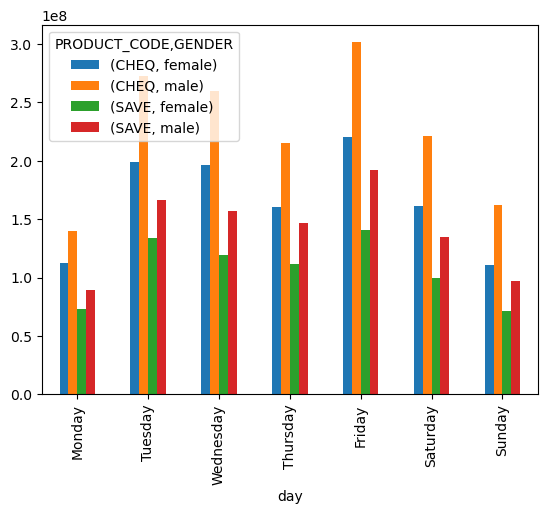

In [64]:
sd.plot(kind ="bar")

In [65]:
#sd = pd.pivot_table(data8, index = "day", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)
#sd

In [66]:
jk =pd.pivot_table(data8, index ="month", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)
jk

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/1501627722.py:1: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  jk =pd.pivot_table(data8, index ="month", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)


PRODUCT_CODE          CHEQ                        SAVE              
GENDER              female          male        female          male
month                                                               
April         1.262039e+08  1.739526e+08  8.485150e+07  1.131834e+08
August        6.583189e+07  1.115678e+08  2.760186e+07  5.013711e+07
December      1.447828e+08  1.624288e+08  8.960203e+07  1.038069e+08
February      1.160809e+08  1.547393e+08  9.653596e+07  1.223850e+08
January       1.162883e+08  1.448164e+08  8.069828e+07  9.923582e+07
July          7.408226e+07  1.268171e+08  4.323926e+07  6.605712e+07
June          9.639081e+07  1.494471e+08  5.733902e+07  9.025948e+07
March         1.505878e+08  1.916677e+08  1.021831e+08  1.417868e+08
May           1.148276e+08  1.787783e+08  7.440466e+07  1.019248e+08
November      7.195164e+07  8.835339e+07  4.802432e+07  4.940614e+07
October       4.923987e+07  5.486913e+07  3.038828e+07  2.854448e+07
September     3.422888e+07  3.449942e+07  1.448884e+07  1.626395e+07

<Axes: title={'center': 'account balance by gender and product code'}, xlabel='month'>

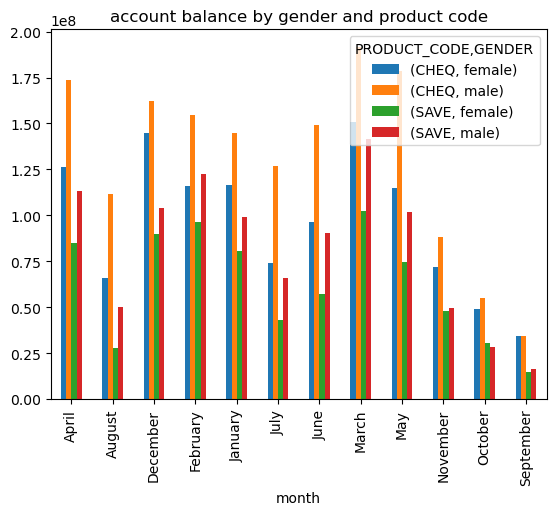

In [67]:
jk.plot(kind ="bar",title ="account balance by gender and product code")

In [68]:
UI =pd.pivot_table(data8, index ="month", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)
UI

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/22717482.py:1: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  UI =pd.pivot_table(data8, index ="month", columns =["PRODUCT_CODE", "GENDER"], values ="ACCOUNT_BALANCE", aggfunc =np.sum)


PRODUCT_CODE          CHEQ                        SAVE              
GENDER              female          male        female          male
month                                                               
April         1.262039e+08  1.739526e+08  8.485150e+07  1.131834e+08
August        6.583189e+07  1.115678e+08  2.760186e+07  5.013711e+07
December      1.447828e+08  1.624288e+08  8.960203e+07  1.038069e+08
February      1.160809e+08  1.547393e+08  9.653596e+07  1.223850e+08
January       1.162883e+08  1.448164e+08  8.069828e+07  9.923582e+07
July          7.408226e+07  1.268171e+08  4.323926e+07  6.605712e+07
June          9.639081e+07  1.494471e+08  5.733902e+07  9.025948e+07
March         1.505878e+08  1.916677e+08  1.021831e+08  1.417868e+08
May           1.148276e+08  1.787783e+08  7.440466e+07  1.019248e+08
November      7.195164e+07  8.835339e+07  4.802432e+07  4.940614e+07
October       4.923987e+07  5.486913e+07  3.038828e+07  2.854448e+07
September     3.422888e+07  3.449942e+07  1.448884e+07  1.626395e+07

<Axes: title={'center': 'amount by product code and gender'}, xlabel='month'>

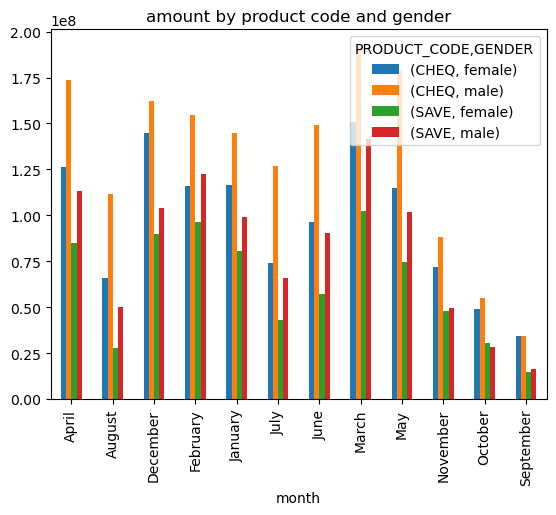

In [69]:
UI.plot(kind ="bar", title ="amount by product code and gender")

In [70]:
sw =pd.pivot_table(data8, index ="month", columns =["PRODUCT_CODE", "GENDER"], values ="AMT", aggfunc =np.sum)
sw

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/125338153.py:1: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sw =pd.pivot_table(data8, index ="month", columns =["PRODUCT_CODE", "GENDER"], values ="AMT", aggfunc =np.sum)


PRODUCT_CODE        CHEQ                   SAVE           
GENDER            female        male     female       male
month                                                     
April          596694.37   750960.43   -1442.11  -35647.28
August        1001350.87  1407241.06 -171859.89   -5116.31
December      -259443.77  -580224.62   41511.35  -15326.46
February        94205.94   275464.08  703442.11  804643.99
January          9166.35   194676.67   66496.58  261463.39
July           485746.10   869482.83 -323416.12 -327621.70
June           969114.68  1146010.93 -314503.12  187863.82
March          250980.26   -96704.98 -313157.82  342708.51
May            842984.01  1158801.34  -73347.11  109750.44
November       151064.83   151551.70    7608.77  262133.93
October        -73118.83  -298510.81   92236.98  -72301.25
September       63448.81    54512.71   30912.74   76385.78

<Axes: xlabel='month'>

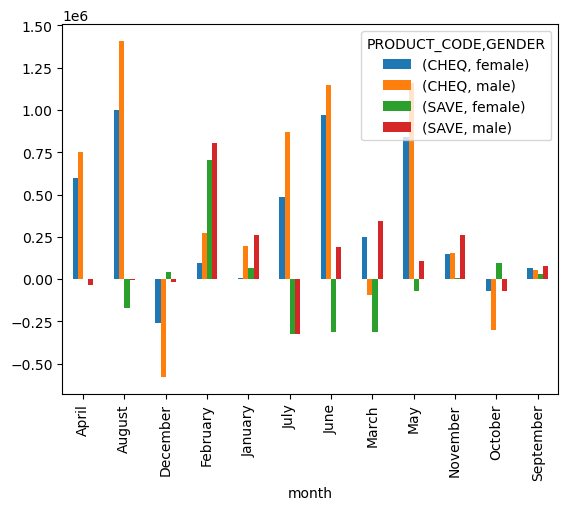

In [71]:
sw.plot(kind ="bar")

In [72]:
lk = pd.pivot_table(data8, index ="day", columns =["CHANNEL", "GENDER"], values ="AMT", aggfunc =np.mean)
lk

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/732195103.py:1: FutureWarning: The provided callable <function mean at 0x128166e80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  lk = pd.pivot_table(data8, index ="day", columns =["CHANNEL", "GENDER"], values ="AMT", aggfunc =np.mean)


CHANNEL           atm                internet                  system  \
GENDER         female        male      female        male      female   
day                                                                     
Monday    -383.551936 -461.349609 -413.433192 -193.370102  905.989191   
Tuesday   -372.797398 -463.746109 -403.317507 -259.294110   14.103801   
Wednesday -386.337796 -511.764601 -394.775094 -168.845290   64.101361   
Thursday  -413.041132 -612.384415 -327.001962    2.484198  379.062724   
Friday    -444.251272 -643.145323 -248.254838  -73.564791  439.390454   
Saturday  -398.218865 -616.525183 -351.755468 -208.056561 -229.310710   
Sunday    -325.166714 -455.579192 -265.135655 -227.536782 -316.450471   

CHANNEL                     teller               
GENDER           male       female         male  
day                                              
Monday     978.021042  3185.311323  3307.045247  
Tuesday     20.898321  3156.164896  3098.479519  
Wednesday   72.922685  3125.494689  3132.259005  
Thursday   511.874273  3136.267372  2807.587944  
Friday     573.742294  2900.334133  2932.799487  
Saturday  -206.916860  2015.989876  2390.979565  
Sunday    -300.474216  1250.433765  1442.613480

<Axes: xlabel='day'>

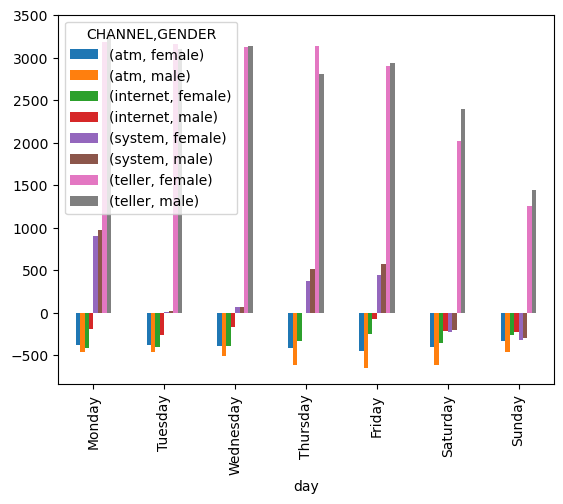

In [73]:
lk.plot(kind ="bar", title ="")

In [74]:
lO = pd.pivot_table(data8, index ="month", columns ="CHANNEL", values ="ACCOUNT_BALANCE", aggfunc =np.mean)
lO

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/2585448908.py:1: FutureWarning: The provided callable <function mean at 0x128166e80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  lO = pd.pivot_table(data8, index ="month", columns ="CHANNEL", values ="ACCOUNT_BALANCE", aggfunc =np.mean)


CHANNEL,atm,internet,system,teller
month,,,,
April,4269.323620,5116.067922,5154.613241,5536.423433
August,5368.803335,6257.016904,5885.904543,6984.917966
December,5319.061463,6488.904306,6495.741277,6857.608306
February,4106.703712,5299.257180,5124.966128,6149.775312
January,4343.880981,5177.833069,5371.870904,6178.356114
July,4940.392789,5484.306595,5274.884837,6035.534025
June,5060.880931,5502.564750,5510.049107,5939.460368
March,4272.112965,5274.958223,5237.341465,6037.125734
May,4446.216690,5212.591947,5244.832121,5884.213318


<Axes: xlabel='month'>

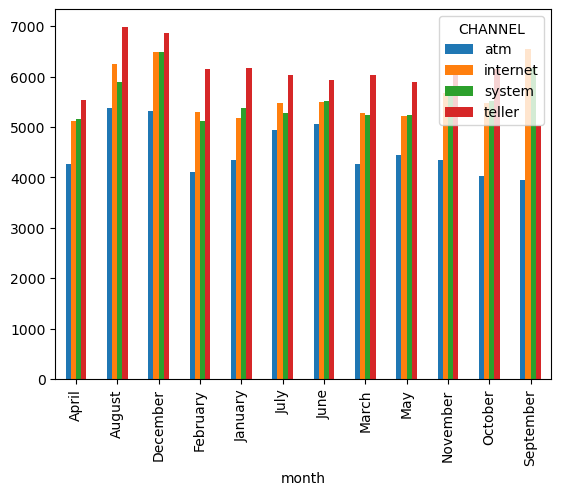

In [75]:
lO.plot(kind ="bar")

In [76]:
data8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847544 entries, 0 to 847543
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   DATE_LAST_UPDATED         847544 non-null  object  
 1   GENDER                    847544 non-null  object  
 2   INCOME_GROUP_CODE         847544 non-null  int64   
 3   NUMBER_OF_ACCOUNTS        847544 non-null  int64   
 4   OCCUPATIONAL_STATUS_CODE  847544 non-null  int64   
 5   AGE                       847544 non-null  object  
 6   N_CUSTOMER_ID             847544 non-null  int64   
 7   income_group_code         847544 non-null  int64   
 8   income_group_desc         847544 non-null  object  
 9   TRANSACTION_DESCRIPTION   475339 non-null  object  
 10  RECORD_DATE               847544 non-null  object  
 11  ACCOUNT_TYPE_CODE         847544 non-null  object  
 12  ACCOUNT_BALANCE           847544 non-null  float64 
 13  AMT                       847

In [77]:
custom_sort_order = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with custom sorting order
data8['month'] = pd.Categorical(data8['month'], categories=custom_sort_order, ordered=True)

bn =pd.pivot_table(data8, index ="month", columns ="TRANSACTION_DESCRIPTION", values ="AMT", aggfunc=np.sum, dropna =True)
bn

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/3041969922.py:7: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  bn =pd.pivot_table(data8, index ="month", columns ="TRANSACTION_DESCRIPTION", values ="AMT", aggfunc=np.sum, dropna =True)


TRANSACTION_DESCRIPTION,ACB CREDIT,ACB DEBIT REVERSAL,ACB DEBIT:EXTERNAL,ACB DEBIT:INTERNAL,ACB EXT DISP ONLNE,ACB INT DISP BRNCH,ACB INT DISP ONLNE,ACT PAYMENT FROM,AEDO TRACKED DO,AIRTIME DBT ATMS,...,TRANSFER FROM,TRANSFER TO,TRANSFER TO CLOSE,TRAVEL FOREX(PFC),TRAVEL FOREX(TFC),TRF TO CLOSE COR,TRI ATM WITHDRAWAL,UNPAID DEBIT,WESTERN UNION(CBI),WESTERN UNION(CBO)
month,,,,,,,,,,,,,,,,,,,,,
January,13785505.54,18649.24,-1423173.10,-90470.11,11977.20,1181.50,433.00,4942.5,0.00,0.0,...,1531393.28,-155967.80,0.00,0.00,0.00,0.0,-149150.0,121710.39,0.00,0.00
February,14088136.05,19737.79,-1428393.72,-91965.23,12612.45,0.00,0.00,0.0,0.00,0.0,...,2218876.10,-267234.18,0.00,0.00,0.00,0.0,-131450.0,113169.35,5062.79,0.00
March,16544119.88,38662.87,-1628856.99,-102348.15,17564.68,1598.51,328.05,988.5,0.00,0.0,...,2201381.15,-121688.85,-525.41,0.00,-15461.75,0.0,-154950.0,174374.72,1221.77,0.00
April,16019415.61,20170.95,-1395564.98,-73731.53,15365.72,0.00,231.85,1977.0,0.00,0.0,...,2046919.58,-72103.10,-849.90,11093.57,0.00,0.0,-130200.0,161401.33,0.00,-1681.12
May,14121036.95,21734.93,-1204363.05,-63756.90,12705.96,0.00,0.00,0.0,0.00,0.0,...,3332606.18,-138801.45,-9149.88,0.00,0.00,0.0,-107650.0,143377.98,0.00,-2225.98
June,11793944.71,19635.52,-1005972.21,-46307.19,9606.84,0.00,0.00,5070.0,0.00,0.0,...,3199415.08,-119761.74,0.00,0.00,-20439.23,0.0,-54700.0,137457.90,0.00,-29999.96
July,9617142.25,12242.65,-756048.29,-33091.74,5087.97,0.00,175.05,15486.6,-400.00,-99.0,...,2625498.74,-179882.62,-13.19,0.00,0.00,0.0,-69100.0,133779.55,0.00,0.00
August,7525238.89,11580.12,-587513.69,-23942.09,2241.82,5909.27,0.00,0.0,-12422.97,0.0,...,3487813.27,-138402.91,-3671.53,0.00,0.00,50.0,-42950.0,96817.63,1662.57,-2776.68
September,3973387.31,3526.82,-364468.66,-13689.16,2064.45,0.00,0.00,0.0,-3740.77,0.0,...,110000.00,-8300.00,0.00,0.00,0.00,0.0,-33850.0,18735.84,0.00,0.00


In [78]:
# Define custom sorting order for months
custom_sort_order = ['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with custom sorting order
data8['month'] = pd.Categorical(data8['month'], categories=custom_sort_order, ordered=True)

# Create the pivot table
bn = pd.pivot_table(data8, 
                    index="month", 
                    columns=["TRANSACTION_DESCRIPTION","CHANNEL"], 
                    values="AMT", 
                    aggfunc=np.sum, 
                    dropna=True)

# Get the top five transaction descriptions in each month
top_five = bn.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)

# Display the top five transaction descriptions in each month
top_five

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/3948648936.py:9: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  bn = pd.pivot_table(data8,


TRANSACTION_DESCRIPTION,ACB CREDIT,CREDIT TRANSFER,DIGITAL PAYMENT CR,IBANK PAYMENT FROM,IBANK TRANSFER,IMMEDIATE TRF CR,OPENED-FROM SAV,TRANSFER FROM
CHANNEL,system,system,internet,internet,internet,teller,teller,teller
month,,,,,,,,
January,13785505.54,NaN,NaN,1763410.56,1499431.14,1204662.35,NaN,1531393.28
February,14088136.05,NaN,NaN,2471266.01,1814942.49,1362508.83,NaN,2218876.10
March,16544119.88,NaN,NaN,2778646.13,1792620.71,2259022.25,NaN,2201381.15
April,16019415.61,NaN,NaN,2455099.32,1498484.78,1600721.60,NaN,2046919.58
May,14121036.95,NaN,NaN,2803639.24,1563915.44,NaN,1547299.41,3332606.18
June,11793944.71,NaN,NaN,2772037.84,1278417.76,NaN,1606455.65,3199415.08
July,9617142.25,NaN,1176964.74,1197929.21,NaN,NaN,1660155.09,2625498.74
August,7525238.89,NaN,NaN,1281683.32,NaN,994630.47,1703644.31,3487813.27


<Axes: xlabel='month'>

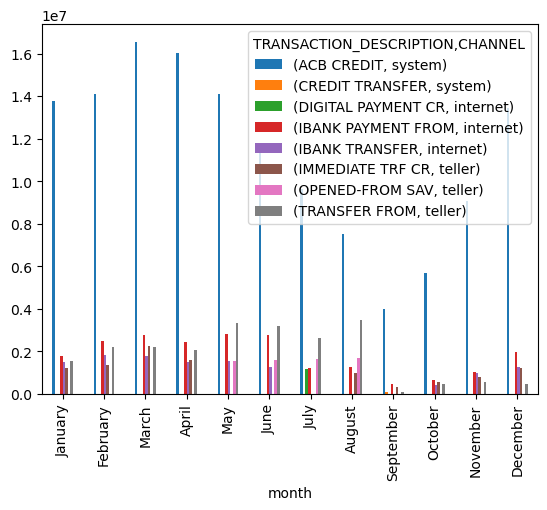

In [79]:
top_five.plot(kind ="bar")

In [80]:
#bn.plot(kind ="bar")

In [81]:
# Define custom sorting order for months
custom_sort_orde = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'month' column to categorical with custom sorting order
data8['day'] = pd.Categorical(data8['day'], categories=custom_sort_orde, ordered=True)

# Create the pivot table
bna = pd.pivot_table(data8, 
                    index="day", 
                    columns=["TRANSACTION_DESCRIPTION","CHANNEL"], 
                    values="AMT", 
                    aggfunc=np.sum, 
                    dropna=True)

# Get the top five transaction descriptions in each month
top_fiv = bna.apply(lambda x: x.sort_values(ascending=False).head(5), axis=1)

# Display the top five transaction descriptions in each month
top_fiv

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/628085468.py:8: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  bna = pd.pivot_table(data8,


TRANSACTION_DESCRIPTION,ACB CREDIT,CARDLESS CASH DEP,DIGITAL TRANSF CR,IBANK PAYMENT FROM,IBANK TRANSFER,IMMEDIATE TRF CR,OPENED-FROM SAV,TRANSFER FROM
CHANNEL,system,atm,internet,internet,internet,teller,teller,teller
day,,,,,,,,
Monday,21457709.67,NaN,NaN,2995157.35,1918821.00,2098955.34,NaN,3812262.31
Tuesday,18945162.46,NaN,NaN,3303462.44,1870557.52,2134107.01,NaN,4055566.48
Wednesday,20780159.53,NaN,NaN,3454012.74,1734174.37,2005022.01,NaN,4193844.84
Thursday,29604317.57,NaN,NaN,4210889.41,1817957.01,2162118.35,NaN,3478564.50
Friday,40407316.23,NaN,NaN,4892035.32,NaN,3120789.24,2067253.9,4509139.84
Saturday,4458741.59,NaN,NaN,2014172.76,1647036.98,1681862.28,NaN,2240592.71
Sunday,NaN,264150.0,170173.0,836977.68,1111829.68,791305.83,NaN,NaN


<Axes: xlabel='day'>

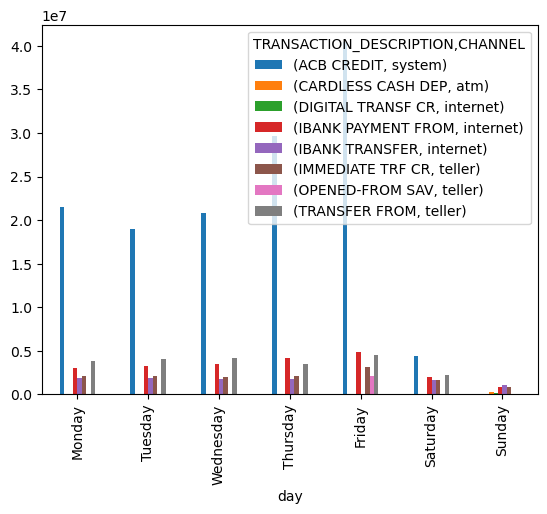

In [82]:
top_fiv.plot(kind ="bar")

In [83]:
do =pd.crosstab(data8.TRANSACTION_DESCRIPTION, data8.PRODUCT_CODE)
do


PRODUCT_CODE,CHEQ
TRANSACTION_DESCRIPTION,
ACB CREDIT,18641
ACB DEBIT REVERSAL,202
ACB DEBIT:EXTERNAL,21300
ACB DEBIT:INTERNAL,844
ACB EXT DISP ONLNE,496
...,...
TRF TO CLOSE COR,1
TRI ATM WITHDRAWAL,1559
UNPAID DEBIT,2563


<Axes: xlabel='TRANSACTION_DESCRIPTION'>

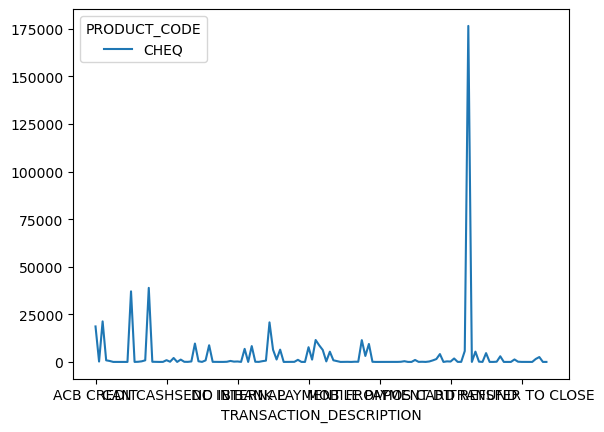

In [84]:
do.plot(kind ="line")

In [85]:
yu =data8["TRANSACTION_DESCRIPTION"]

yu.value_counts().head(60)

TRANSACTION_DESCRIPTION
POS PURCHASE          176520
ATM WITHDRAWAL         38907
AIRTIME DEBIT          37079
ACB DEBIT:EXTERNAL     21300
DIGITAL PAYMENT DT     20784
ACB CREDIT             18641
IBANK TRANSFER         11515
LOTTO PURCHASE         11453
CASHSEND DIGITAL        9658
MANAGEMENT FEE          9439
CHARGES                 8761
IMDTE DIGITAL PMT       8726
DC TRACK INTERNAL       8323
IBANK PAYMENT FROM      7731
DC TRACK EXTERNAL       6862
DIGITAL TRANSF DT       6449
DIGITAL TRAN FEES       6424
IMMEDIATE TRF CR        6295
POS PUR & CASH          5734
PREPAID DEBIT           5403
INT DEBIT ORDER TO      5373
REWARDS FEE             4624
OVERSEAS PURCHASE       4123
LOTTO WINNINGS          3136
STOP ORDER TO           2965
UNPAID DEBIT            2563
CARDLESS CASH DEP       2068
POS CASH WDL            1810
TRI ATM WITHDRAWAL      1559
OPENED-FROM SAV         1509
TRANSFER FROM           1303
DIGITAL TRANSF CR       1269
CASH ACCEPTOR DEP       1223
IBANK PAYMENT TO   

In [86]:
#dat =data8[data8["AMT"]< -10]
#sd =dat["TRANSACTION_DESCRIPTION"].value_count().head(10) 


In [137]:
#dats =data8["TRANSACTION_DESCRIPTION"]
dat = data8[data8['CHANNEL'] == "atm"]
dats = dat[dat["AMT"] > 0]
top = dats["TRANSACTION_DESCRIPTION"].value_counts().head(60)
top

TRANSACTION_DESCRIPTION
CARDLESS CASH DEP        2068
CASH ACCEPTOR DEP        1223
ATM TRANSFER              596
PREPAID DEBIT  COR        139
ATM PAYMENT FR             80
CAN CASHSEND ATM           25
PREPAID DEBIT√Ç¬† COR      12
AIRTIME DEBIT COR           6
CARDLESS NOTE DEP           2
NOTE DEPOSIT                2
Name: count, dtype: int64

In [140]:
dat = data8[data8["AMT"] < 0]
top_transaction_descriptions = dat["TRANSACTION_DESCRIPTION"].value_counts().head(10)
top_transaction_descriptions 


TRANSACTION_DESCRIPTION
POS PURCHASE          176520
ATM WITHDRAWAL         38907
AIRTIME DEBIT          37079
ACB DEBIT:EXTERNAL     21300
DIGITAL PAYMENT DT     20784
LOTTO PURCHASE         11453
CASHSEND DIGITAL        9658
MANAGEMENT FEE          9439
CHARGES                 8757
IMDTE DIGITAL PMT       8726
Name: count, dtype: int64

In [138]:
#transaction_cause = "ACB CREDIT"

filtered_df = data8[data8["TRANSACTION_DESCRIPTION"] == "ACB DEBIT:EXTERNAL"]
filtered_df["AMT"].max()
#filtered_df.info()

# Access the 'transaction_description' column from the filtered DataFrame
#transaction_descriptions = filtered_df["TRANSACTION_DESCRIPTION"]

# Print the transaction descriptions for the chosen cause
#transaction_descriptions

-0.06

In [90]:
gf = pd.pivot_table(filtered_df, 
                    index='day', 
                    columns='TRANSACTION_DESCRIPTION', 
                    values='AMT', 
                    aggfunc=np.sum)

gf

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/1535363112.py:1: FutureWarning: The provided callable <function sum at 0x128165da0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  gf = pd.pivot_table(filtered_df,


TRANSACTION_DESCRIPTION,ACB DEBIT:EXTERNAL
day,
Monday,-2725483.13
Tuesday,-3078943.32
Wednesday,-1887140.95
Thursday,-1307785.85
Friday,-2360307.65
Saturday,-1176989.58
Sunday,-6724.53


<Axes: xlabel='day'>

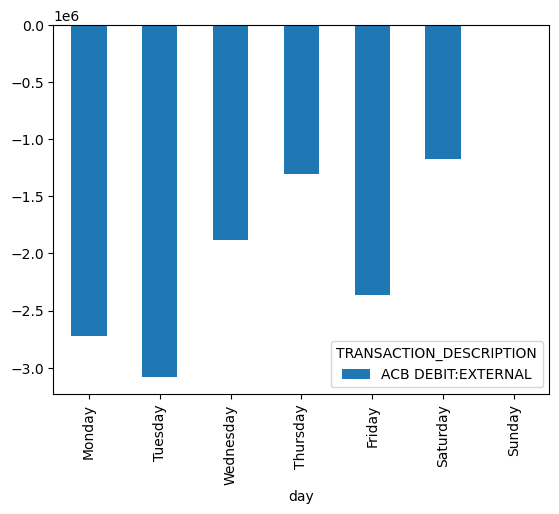

In [91]:
gf.plot(kind ="bar")

In [92]:
data8["AMT"].max()

51027.04

#### AIRTIME DEBIT

In [93]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() ==True]
data2 = data2[data2['CHANNEL'] == "atm"]
data2

# Corrected the condition for 'AMT'
data2Ca = data2[(data2['AMT'] <= -0.01) & (data2['AMT'] >= -699.99)]

# Use .loc to assign values to the filtered rows
data2Ca.loc[:, 'TRANSACTION_DESCRIPTION'] = "AIRTIME DEBIT"
data2Ca


,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
1,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1486,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-14 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"
2,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1478,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-03 00:00:00+02:00,2022,January,Monday,"Legislators, senior officials and managers"
3,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1577,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-21 00:00:00+02:00,2022,March,Monday,"Legislators, senior officials and managers"
6,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1583,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-25 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
7,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1493,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-21 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847508,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,AIRTIME DEBIT,...,71,SAVE,atm,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-07 00:00:00+02:00,2021,September,Tuesday,"Legislators, senior officials and managers"
847514,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,AIRTIME DEBIT,...,83,SAVE,atm,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-09 00:00:00+02:00,2021,September,Thursday,"Legislators, senior officials and managers"
847516,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,AIRTIME DEBIT,...,246,SAVE,atm,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-16 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
847522,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,AIRTIME DEBIT,...,175,SAVE,atm,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-11-15 00:00:00+02:00,2021,November,Monday,"Legislators, senior officials and managers"


#### LOTTO PURCHASE

In [94]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]
data2 = data2[data2['CHANNEL'] == "atm"]

# Corrected the condition for 'AMT'
data2Da = data2[(data2['AMT'] <= -700.00) & (data2['AMT'] >= -750.99)]

# Use .loc to assign values to the filtered rows
data2Da.loc[:, 'TRANSACTION_DESCRIPTION'] = "LOTTO PURCHASE"
data2Da


,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
22,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",LOTTO PURCHASE,...,1437,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-11-20 00:00:00+02:00,2021,November,Saturday,"Legislators, senior officials and managers"
28,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",LOTTO PURCHASE,...,1537,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-02-25 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"
127,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",LOTTO PURCHASE,...,1570,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-19 00:00:00+02:00,2022,March,Saturday,"Legislators, senior officials and managers"
145,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",LOTTO PURCHASE,...,1362,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-09-17 00:00:00+02:00,2021,September,Friday,"Legislators, senior officials and managers"
282,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",LOTTO PURCHASE,...,1731,SAVE,atm,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-18 00:00:00+02:00,2022,March,Friday,Technicians and associate professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837260,22-Jul,male,1,4,1,26-35,2436,1,R 0 - 499,LOTTO PURCHASE,...,982,SAVE,atm,099ed0e308d3d97b5a747d3ea5de0319406e0b892df8b6...,NaN,2022-02-05 00:00:00+02:00,2022,February,Saturday,"Legislators, senior officials and managers"
837298,22-Jul,male,1,4,1,26-35,2436,1,R 0 - 499,LOTTO PURCHASE,...,925,SAVE,atm,099ed0e308d3d97b5a747d3ea5de0319406e0b892df8b6...,NaN,2022-01-16 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
838499,22-Aug,male,1,6,1,36-45,3202,1,R 0 - 499,LOTTO PURCHASE,...,412,SAVE,atm,198bc222be486837826e4c298e4d28498f62cfb5972a53...,NaN,2022-02-01 00:00:00+02:00,2022,February,Tuesday,"Legislators, senior officials and managers"
838937,22-Apr,female,1,5,4,66+,3701,1,R 0 - 499,LOTTO PURCHASE,...,1150,SAVE,atm,1a3a3ea2b4d4685fe1268a063b24f7e5d09e18ae76528d...,NaN,2021-12-03 00:00:00+02:00,2021,December,Friday,Clerks


#### PREPAID DEBIT

In [95]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]
data2 = data2[data2['CHANNEL'] == "atm"]

# Corrected the condition for 'AMT'
data2Ea = data2[(data2['AMT'] <= -751.00) & (data2['AMT'] >= -1000.99)]


# Use .loc to assign values to the filtered rows
data2Ea.loc[:, 'TRANSACTION_DESCRIPTION'] = "PREPAID DEBIT"

# Print the resulting DataFrame
data2Ea


,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
0,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",PREPAID DEBIT,...,1489,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-16 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
23,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",PREPAID DEBIT,...,1557,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-11 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
27,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",PREPAID DEBIT,...,1521,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-02-11 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"
66,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",PREPAID DEBIT,...,1347,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-09-03 00:00:00+02:00,2021,September,Friday,"Legislators, senior officials and managers"
67,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",PREPAID DEBIT,...,1548,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-04 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842591,22-Aug,male,1,8,1,36-45,4436,1,R 0 - 499,PREPAID DEBIT,...,159,SAVE,atm,7430d5c20ae5aa835f6d8b00f593f282e77c6eb011ffdc...,NaN,2022-01-04 00:00:00+02:00,2022,January,Tuesday,"Legislators, senior officials and managers"
842698,22-Aug,male,1,8,1,36-45,4436,1,R 0 - 499,PREPAID DEBIT,...,256,SAVE,atm,7430d5c20ae5aa835f6d8b00f593f282e77c6eb011ffdc...,NaN,2022-02-13 00:00:00+02:00,2022,February,Sunday,"Legislators, senior officials and managers"
844904,22-Aug,male,1,6,7,66+,4598,1,R 0 - 499,PREPAID DEBIT,...,2288,SAVE,atm,e07fe77c09655c6219baa155b6bde8022c627041022dd4...,NaN,2021-11-02 00:00:00+02:00,2021,November,Tuesday,Craft and related trades workers
845253,22-Jul,female,1,5,4,46-55,4617,1,R 0 - 499,PREPAID DEBIT,...,1534,SAVE,atm,04b0e2d1b8fdf5739748da0d0fb31f54f928dd851adf43...,NaN,2021-11-13 00:00:00+02:00,2021,November,Saturday,Clerks


#### ATM WITHDRAWAL

In [96]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "atm"]
data2Fa = data2[(data2['AMT'] <= -1001.00) & (data2['AMT'] >= -5000.00)]
data2Fa.loc[:, 'TRANSACTION_DESCRIPTION'] = "MANAGEMENT FEE"
#data2Fa.loc[:,"ATM WITHDRAWAL"] = "MANAGEMENT FEE"
data2Fa


,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
29,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1507,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-02-04 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"
33,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1389,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-10-08 00:00:00+02:00,2021,October,Friday,"Legislators, senior officials and managers"
34,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1443,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-12-03 00:00:00+02:00,2021,December,Friday,"Legislators, senior officials and managers"
79,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1509,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-02-05 00:00:00+02:00,2022,February,Saturday,"Legislators, senior officials and managers"
84,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1602,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-31 00:00:00+02:00,2022,March,Thursday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845315,22-Jul,female,1,5,4,46-55,4617,1,R 0 - 499,MANAGEMENT FEE,...,1739,SAVE,atm,04b0e2d1b8fdf5739748da0d0fb31f54f928dd851adf43...,NaN,2022-01-12 00:00:00+02:00,2022,January,Wednesday,Clerks
847292,22-Jul,male,21,10,1,46-55,1271,21,"R125,000+",MANAGEMENT FEE,...,1280,SAVE,atm,44256c3a7ea1ad64a7bced02a3793705b1d5afe3d855b7...,NaN,2022-06-25 00:00:00+02:00,2022,June,Saturday,"Legislators, senior officials and managers"
847295,22-Jul,male,21,10,1,46-55,1271,21,"R125,000+",MANAGEMENT FEE,...,1275,SAVE,atm,44256c3a7ea1ad64a7bced02a3793705b1d5afe3d855b7...,NaN,2022-06-11 00:00:00+02:00,2022,June,Saturday,"Legislators, senior officials and managers"
847319,22-Jul,male,21,10,1,46-55,1271,21,"R125,000+",MANAGEMENT FEE,...,1282,SAVE,atm,44256c3a7ea1ad64a7bced02a3793705b1d5afe3d855b7...,NaN,2022-06-27 00:00:00+02:00,2022,June,Monday,"Legislators, senior officials and managers"


#### MANAGEMENT FEE 

In [97]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data2A = data2a[(data2a['AMT'] <= -0.01) & (data2a['AMT'] >= -460.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data2A.loc[:, 'TRANSACTION_DESCRIPTION'] = "MANAGEMENT FEE"

# Print the resulting DataFrame
data2A


,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
4,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1575,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-20 00:00:00+02:00,2022,March,Sunday,"Legislators, senior officials and managers"
5,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1384,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-10-01 00:00:00+02:00,2021,October,Friday,"Legislators, senior officials and managers"
8,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1367,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-09-21 00:00:00+02:00,2021,September,Tuesday,"Legislators, senior officials and managers"
11,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1379,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-09-30 00:00:00+02:00,2021,September,Thursday,"Legislators, senior officials and managers"
14,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",MANAGEMENT FEE,...,1396,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-10-17 00:00:00+02:00,2021,October,Sunday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847532,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,MANAGEMENT FEE,...,126,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-10-06 00:00:00+02:00,2021,October,Wednesday,"Legislators, senior officials and managers"
847533,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,MANAGEMENT FEE,...,240,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-09 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
847534,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,MANAGEMENT FEE,...,232,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-08 00:00:00+02:00,2022,January,Saturday,"Legislators, senior officials and managers"
847535,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,MANAGEMENT FEE,...,267,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-23 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"


#### ACB DEBIT:EXTERNAL

In [98]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data2B = data2a[(data2a['AMT'] <= -461.00) & (data2a['AMT'] >= -12284.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data2B.loc[:, 'TRANSACTION_DESCRIPTION'] = "ACB DEBIT:EXTERNAL"

# Print the resulting DataFrame
data2B

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
50,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",ACB DEBIT:EXTERNAL,...,1452,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-12-12 00:00:00+02:00,2021,December,Sunday,"Legislators, senior officials and managers"
75,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",ACB DEBIT:EXTERNAL,...,1597,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-29 00:00:00+02:00,2022,March,Tuesday,"Legislators, senior officials and managers"
93,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",ACB DEBIT:EXTERNAL,...,1603,SAVE,system,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-31 00:00:00+02:00,2022,March,Thursday,"Legislators, senior officials and managers"
150,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",ACB DEBIT:EXTERNAL,...,2110,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-07-13 00:00:00+02:00,2022,July,Wednesday,Technicians and associate professionals
151,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",ACB DEBIT:EXTERNAL,...,1751,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-27 00:00:00+02:00,2022,March,Sunday,Technicians and associate professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847498,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,ACB DEBIT:EXTERNAL,...,171,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-11-10 00:00:00+02:00,2021,November,Wednesday,"Legislators, senior officials and managers"
847506,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,ACB DEBIT:EXTERNAL,...,238,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-09 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
847510,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,ACB DEBIT:EXTERNAL,...,275,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-25 00:00:00+02:00,2022,January,Tuesday,"Legislators, senior officials and managers"
847512,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,ACB DEBIT:EXTERNAL,...,219,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-04 00:00:00+02:00,2022,January,Tuesday,"Legislators, senior officials and managers"


#### POS PURCHASE 

In [99]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data2C = data2a[(data2a['AMT'] <= -12285.00) & (data2a['AMT'] >= -39700)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data2C.loc[:, 'TRANSACTION_DESCRIPTION'] = "POS PURCHASE"

# Print the resulting DataFrame
data2C

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
45983,22-Sep,male,14,20,1,56-65,552,14,"R15,000 - 19,999",POS PURCHASE,...,1203,SAVE,system,0998bc01c82a33b080e07783545a8731f333837eb30b36...,NaN,2022-03-24 00:00:00+02:00,2022,March,Thursday,"Legislators, senior officials and managers"
83511,22-Aug,male,14,17,1,46-55,2321,14,"R15,000 - 19,999",POS PURCHASE,...,3135,SAVE,system,73de06d59fea4c3db3033fbed02e80076b5474cc7febc1...,NaN,2021-10-30 00:00:00+02:00,2021,October,Saturday,"Legislators, senior officials and managers"
92638,22-Aug,female,14,8,1,36-45,2583,14,"R15,000 - 19,999",POS PURCHASE,...,936,SAVE,system,80edf700ed92b18edad2ed07d54040651a0b837846e77c...,NaN,2022-04-08 00:00:00+02:00,2022,April,Friday,"Legislators, senior officials and managers"
92691,22-Aug,female,14,8,1,36-45,2583,14,"R15,000 - 19,999",POS PURCHASE,...,938,SAVE,system,80edf700ed92b18edad2ed07d54040651a0b837846e77c...,NaN,2022-04-08 00:00:00+02:00,2022,April,Friday,"Legislators, senior officials and managers"
127202,22-Aug,female,14,8,1,26-35,3748,14,"R15,000 - 19,999",POS PURCHASE,...,11099,SAVE,system,db0b593ff895f884691009eb9b37fd49970152c6e989cd...,NaN,2021-11-30 00:00:00+02:00,2021,November,Tuesday,"Legislators, senior officials and managers"
154714,22-Aug,female,14,10,1,46-55,4770,14,"R15,000 - 19,999",POS PURCHASE,...,2830,SAVE,system,b71b00a3b020b73de10373634c4467d9df7a45dc82b2f3...,NaN,2022-06-10 00:00:00+02:00,2022,June,Friday,"Legislators, senior officials and managers"
206120,22-Sep,female,12,7,1,36-45,3061,12,"R10,000 - 11,999",POS PURCHASE,...,1638,SAVE,system,7240edb075164f08e560b8c87a7713ec70b39e716f63ab...,NaN,2022-01-28 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"
216547,22-May,female,12,5,1,46-55,3839,12,"R10,000 - 11,999",POS PURCHASE,...,10200,SAVE,system,e682200da82c358e7b347db68312f1bc310613c8c5619b...,NaN,2022-05-19 00:00:00+02:00,2022,May,Thursday,"Legislators, senior officials and managers"
219666,22-Mar,female,12,5,1,26-35,4011,12,"R10,000 - 11,999",POS PURCHASE,...,1799,SAVE,system,e47f4e2b8fa2fdb955b0ff0dce0f1e5e6de3f17213f923...,NaN,2022-02-16 00:00:00+02:00,2022,February,Wednesday,"Legislators, senior officials and managers"
239368,22-Aug,female,15,10,1,46-55,361,15,"R20,000 - 24,999",POS PURCHASE,...,9063,SAVE,system,a1f0fae9b7ab7c26b97ccfe0527e2e7f5d38652c281812...,NaN,2022-03-03 00:00:00+02:00,2022,March,Thursday,"Legislators, senior officials and managers"


### INTERNET

#### CASHSEND DIGITAL 

In [100]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "internet"]

# Filter rows based on 'AMT' conditions
data3A = data2a[(data2a['AMT'] <= -0.0) & (data2a['AMT'] >= -3000.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data3A.loc[:, 'TRANSACTION_DESCRIPTION'] = "CASHSEND DIGITAL"

# Print the resulting DataFrame
data3A

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
131,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CASHSEND DIGITAL,...,1605,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-31 00:00:00+02:00,2022,March,Thursday,"Legislators, senior officials and managers"
138,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CASHSEND DIGITAL,...,1538,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-02-27 00:00:00+02:00,2022,February,Sunday,"Legislators, senior officials and managers"
632,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",CASHSEND DIGITAL,...,789,SAVE,internet,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2022-03-27 00:00:00+02:00,2022,March,Sunday,"Legislators, senior officials and managers"
635,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",CASHSEND DIGITAL,...,564,SAVE,internet,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2021-12-23 00:00:00+02:00,2021,December,Thursday,"Legislators, senior officials and managers"
640,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",CASHSEND DIGITAL,...,544,SAVE,internet,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2021-11-30 00:00:00+02:00,2021,November,Tuesday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847504,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,CASHSEND DIGITAL,...,155,SAVE,internet,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-10-21 00:00:00+02:00,2021,October,Thursday,"Legislators, senior officials and managers"
847511,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,CASHSEND DIGITAL,...,212,SAVE,internet,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-12-31 00:00:00+02:00,2021,December,Friday,"Legislators, senior officials and managers"
847519,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,CASHSEND DIGITAL,...,299,SAVE,internet,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-30 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
847530,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,CASHSEND DIGITAL,...,80,SAVE,internet,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-09 00:00:00+02:00,2021,September,Thursday,"Legislators, senior officials and managers"


#### IMDTE DIGITAL PMT

In [101]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "internet"]

# Filter rows based on 'AMT' conditions
data3B = data2a[(data2a['AMT'] <= -3001.00) & (data2a['AMT'] >= -43250.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data3B.loc[:, 'TRANSACTION_DESCRIPTION'] = "IMDTE DIGITAL PMT"

# Print the resulting DataFrame
data3B

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
642,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",IMDTE DIGITAL PMT,...,558,SAVE,internet,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2021-12-22 00:00:00+02:00,2021,December,Wednesday,"Legislators, senior officials and managers"
1537,22-Aug,male,11,11,1,46-55,254,11,"R9,000 - 9,999",IMDTE DIGITAL PMT,...,1175,SAVE,internet,4269c490a349e56882fcdd320f8d10546ae53f2e757412...,NaN,2022-06-24 00:00:00+02:00,2022,June,Friday,"Legislators, senior officials and managers"
2146,22-Jul,female,11,9,1,36-45,407,11,"R9,000 - 9,999",IMDTE DIGITAL PMT,...,8372,SAVE,internet,e381bc1052e8923e8263c6cbceb0d65ce50503bd8c0b61...,NaN,2022-03-06 00:00:00+02:00,2022,March,Sunday,"Legislators, senior officials and managers"
2162,22-Jul,female,11,9,1,36-45,407,11,"R9,000 - 9,999",IMDTE DIGITAL PMT,...,8270,SAVE,internet,e381bc1052e8923e8263c6cbceb0d65ce50503bd8c0b61...,NaN,2021-12-20 00:00:00+02:00,2021,December,Monday,"Legislators, senior officials and managers"
2175,22-Jul,female,11,9,1,36-45,407,11,"R9,000 - 9,999",IMDTE DIGITAL PMT,...,8308,SAVE,internet,e381bc1052e8923e8263c6cbceb0d65ce50503bd8c0b61...,NaN,2022-01-25 00:00:00+02:00,2022,January,Tuesday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847296,22-Jul,male,21,10,1,46-55,1271,21,"R125,000+",IMDTE DIGITAL PMT,...,1265,SAVE,internet,44256c3a7ea1ad64a7bced02a3793705b1d5afe3d855b7...,NaN,2022-05-05 00:00:00+02:00,2022,May,Thursday,"Legislators, senior officials and managers"
847329,22-Jul,male,21,17,1,56-65,2480,21,"R125,000+",IMDTE DIGITAL PMT,...,3354,SAVE,internet,2661b9973c5dd384b10fac0a30e953b06aee22eb9aba71...,NaN,2022-07-02 00:00:00+02:00,2022,July,Saturday,"Legislators, senior officials and managers"
847401,22-Sep,male,21,6,1,46-55,2816,21,"R125,000+",IMDTE DIGITAL PMT,...,669,SAVE,internet,dd3ac1bebe92bbc5639af8079b993ff12e889137106ba3...,NaN,2022-05-21 00:00:00+02:00,2022,May,Saturday,"Legislators, senior officials and managers"
847404,22-Jul,female,21,11,2,46-55,4381,21,"R125,000+",IMDTE DIGITAL PMT,...,47,SAVE,internet,b404bcff92027d06656055fd11c6d2545157938c0814e0...,NaN,2022-01-26 00:00:00+02:00,2022,January,Wednesday,Professionals


#### DIGITAL TRANSF DT

In [102]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "internet"]

# Filter rows based on 'AMT' conditions
data3C = data2a[(data2a['AMT'] <= -43251.00) & (data2a['AMT'] >= -44799.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data3C.loc[:, 'TRANSACTION_DESCRIPTION'] = "DIGITAL TRANSF DT"

# Print the resulting DataFrame
data3C

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
181571,22-Jul,male,12,6,1,46-55,1224,12,"R10,000 - 11,999",DIGITAL TRANSF DT,...,5,SAVE,internet,8bd1a184c8baf330d96b400b0122f92259a47cd308fdd2...,NaN,2022-06-07 00:00:00+02:00,2022,June,Tuesday,"Legislators, senior officials and managers"


#### DIGITAL PAYMENT DT

In [103]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "internet"]

# Filter rows based on 'AMT' conditions
data3D = data2a[(data2a['AMT'] <= -43251.00) & (data2a['AMT'] >= -44799.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data3D.loc[:, 'TRANSACTION_DESCRIPTION'] = "DIGITAL PAYMENT DT"

# Print the resulting DataFrame
data3D

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
181571,22-Jul,male,12,6,1,46-55,1224,12,"R10,000 - 11,999",DIGITAL PAYMENT DT,...,5,SAVE,internet,8bd1a184c8baf330d96b400b0122f92259a47cd308fdd2...,NaN,2022-06-07 00:00:00+02:00,2022,June,Tuesday,"Legislators, senior officials and managers"


## Teller 

#### JOURNAL DEBIT

In [104]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "teller"]

# Filter rows based on 'AMT' conditions
data4A = data2a[(data2a['AMT'] <= -0.01) & (data2a['AMT'] >= -5772.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data4A.loc[:, 'TRANSACTION_DESCRIPTION'] = "JOURNAL DEBIT"

# Print the resulting DataFrame
data4A

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
289,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",JOURNAL DEBIT,...,2224,SAVE,teller,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-08-26 00:00:00+02:00,2022,August,Friday,Technicians and associate professionals
1690,22-Jun,male,11,6,1,56-65,283,11,"R9,000 - 9,999",JOURNAL DEBIT,...,7504,SAVE,teller,ecd01fe69d0acedfe90d1910d60f70a7e825b7f90d4c1e...,NaN,2022-05-19 00:00:00+02:00,2022,May,Thursday,"Legislators, senior officials and managers"
2188,22-Jul,female,11,9,1,36-45,407,11,"R9,000 - 9,999",JOURNAL DEBIT,...,8547,SAVE,teller,e381bc1052e8923e8263c6cbceb0d65ce50503bd8c0b61...,NaN,2022-06-15 00:00:00+02:00,2022,June,Wednesday,"Legislators, senior officials and managers"
3257,22-Jun,female,11,11,1,46-55,509,11,"R9,000 - 9,999",JOURNAL DEBIT,...,3073,SAVE,teller,aeddecd6c85c2336650b8838ed81e146b2f2b01bf47a46...,NaN,2022-02-09 00:00:00+02:00,2022,February,Wednesday,"Legislators, senior officials and managers"
5329,22-Aug,male,11,10,2,46-55,926,11,"R9,000 - 9,999",JOURNAL DEBIT,...,8959,SAVE,teller,d674544ab631b16dff2c329414eae794df1f2366f4ea7a...,NaN,2022-07-19 00:00:00+02:00,2022,July,Tuesday,Professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847268,22-Aug,male,20,6,1,46-55,5048,20,"R85,000 - 124,999",JOURNAL DEBIT,...,343,SAVE,teller,c8cbba33fa290e9602c17fa0c42456c6571c41d3e1397f...,NaN,2022-08-08 00:00:00+02:00,2022,August,Monday,"Legislators, senior officials and managers"
847273,22-Aug,male,20,6,1,46-55,5048,20,"R85,000 - 124,999",JOURNAL DEBIT,...,325,SAVE,teller,c8cbba33fa290e9602c17fa0c42456c6571c41d3e1397f...,NaN,2022-06-09 00:00:00+02:00,2022,June,Thursday,"Legislators, senior officials and managers"
847274,22-Aug,male,20,6,1,46-55,5048,20,"R85,000 - 124,999",JOURNAL DEBIT,...,318,SAVE,teller,c8cbba33fa290e9602c17fa0c42456c6571c41d3e1397f...,NaN,2022-05-16 00:00:00+02:00,2022,May,Monday,"Legislators, senior officials and managers"
847275,22-Aug,male,20,6,1,46-55,5048,20,"R85,000 - 124,999",JOURNAL DEBIT,...,310,SAVE,teller,c8cbba33fa290e9602c17fa0c42456c6571c41d3e1397f...,NaN,2022-02-07 00:00:00+02:00,2022,February,Monday,"Legislators, senior officials and managers"


#### CASH WITHDRAWAL

In [105]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "teller"]

# Filter rows based on 'AMT' conditions
data4B = data2a[(data2a['AMT'] <= -5773.00) & (data2a['AMT'] >= -30000.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data4B.loc[:, 'TRANSACTION_DESCRIPTION'] = "CASH WITHDRAWAL"

# Print the resulting DataFrame
data4B

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
211,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",CASH WITHDRAWAL,...,1727,SAVE,teller,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-14 00:00:00+02:00,2022,March,Monday,Technicians and associate professionals
275,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",CASH WITHDRAWAL,...,1744,SAVE,teller,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-26 00:00:00+02:00,2022,March,Saturday,Technicians and associate professionals
551,22-Sep,male,11,13,1,46-55,39,11,"R9,000 - 9,999",CASH WITHDRAWAL,...,7565,SAVE,teller,56bedc08f25eda86ea9eb248f0b10d6744078cbdf78bba...,NaN,2022-05-10 00:00:00+02:00,2022,May,Tuesday,"Legislators, senior officials and managers"
816,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",CASH WITHDRAWAL,...,824,SAVE,teller,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2022-04-26 00:00:00+02:00,2022,April,Tuesday,"Legislators, senior officials and managers"
1261,22-Sep,male,11,8,7,66+,139,11,"R9,000 - 9,999",CASH WITHDRAWAL,...,4446,SAVE,teller,4fdba6d5f93bd3e5e0a3f2d051a2374311113ba62c5065...,NaN,2022-08-03 00:00:00+02:00,2022,August,Wednesday,Craft and related trades workers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827607,22-Jul,female,18,10,2,36-45,4639,18,"R42,000 - 62,999",CASH WITHDRAWAL,...,655,SAVE,teller,78737f313d341373e4b75d03d98bae873f27f199958bcb...,NaN,2022-06-24 00:00:00+02:00,2022,June,Friday,Professionals
836990,22-Sep,male,1,3,6,26-35,2315,1,R 0 - 499,CASH WITHDRAWAL,...,2097,SAVE,teller,94b9dd9e71593dd3d29365bf5cbc9dacacb476135df042...,NaN,2022-01-07 00:00:00+02:00,2022,January,Friday,Skilled agricultural and fishery workers
838938,22-Apr,female,1,5,4,66+,3701,1,R 0 - 499,CASH WITHDRAWAL,...,1214,SAVE,teller,1a3a3ea2b4d4685fe1268a063b24f7e5d09e18ae76528d...,NaN,2022-03-22 00:00:00+02:00,2022,March,Tuesday,Clerks
841710,22-Jul,male,1,5,7,66+,4154,1,R 0 - 499,CASH WITHDRAWAL,...,1593,SAVE,teller,6b589ad1531e41daeaaf709c1526adceaaa7d476d8a1cc...,NaN,2022-07-21 00:00:00+02:00,2022,July,Thursday,Craft and related trades workers


#### PINP TELL CASH WDL

In [106]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "teller"]

# Filter rows based on 'AMT' conditions
data4C = data2a[(data2a['AMT'] <= -30001.00) & (data2a['AMT'] >= -45000.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data4C.loc[:, 'TRANSACTION_DESCRIPTION'] = "PINP TELL CASH WDL"

# Print the resulting DataFrame
data4C

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
1802,22-Sep,male,11,12,1,56-65,287,11,"R9,000 - 9,999",PINP TELL CASH WDL,...,940,SAVE,teller,0bac5b37d73f12d486738fa417b9a3fc741d1c3d0ea97c...,NaN,2022-04-07 00:00:00+02:00,2022,April,Thursday,"Legislators, senior officials and managers"
7978,22-Aug,male,11,9,1,56-65,1300,11,"R9,000 - 9,999",PINP TELL CASH WDL,...,4344,SAVE,teller,0e78acfe76259e8f760fb6de83620c099214e6d5fd91ca...,NaN,2022-04-04 00:00:00+02:00,2022,April,Monday,"Legislators, senior officials and managers"
8816,22-Sep,male,11,9,1,36-45,1408,11,"R9,000 - 9,999",PINP TELL CASH WDL,...,2615,SAVE,teller,7f6881fa5dd579dc59a667f3d3c6741d0958e665c4237d...,NaN,2022-01-19 00:00:00+02:00,2022,January,Wednesday,"Legislators, senior officials and managers"
24589,22-Sep,male,11,8,1,26-35,3409,11,"R9,000 - 9,999",PINP TELL CASH WDL,...,285,SAVE,teller,027e193aa28c5dc4ae8692a11028004c698e2ada3336bb...,NaN,2022-07-21 00:00:00+02:00,2022,July,Thursday,"Legislators, senior officials and managers"
57395,22-Sep,male,14,9,1,56-65,965,14,"R15,000 - 19,999",PINP TELL CASH WDL,...,9201,SAVE,teller,44f59067e8bb0825e340a6caf5531ebc942d1e46ceaa74...,NaN,2022-04-22 00:00:00+02:00,2022,April,Friday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800215,22-Sep,female,3,15,7,56-65,1031,3,"R1,000 - 1,999",PINP TELL CASH WDL,...,9742,SAVE,teller,e7e0a3571ea6463ef86cdb43d4a0f7384c2f1230fa244b...,NaN,2022-03-23 00:00:00+02:00,2022,March,Wednesday,Craft and related trades workers
803158,22-Aug,female,3,5,1,26-35,2011,3,"R1,000 - 1,999",PINP TELL CASH WDL,...,2648,SAVE,teller,2bdc35534745501f34ed17346f34015e4ad655aaa5078d...,NaN,2022-08-06 00:00:00+02:00,2022,August,Saturday,"Legislators, senior officials and managers"
805571,22-Jul,male,3,11,7,56-65,3831,3,"R1,000 - 1,999",PINP TELL CASH WDL,...,2786,SAVE,teller,1f95dbbc1d0ba24731282ab9dae9f9e67816b5393a1be3...,NaN,2022-07-05 00:00:00+02:00,2022,July,Tuesday,Craft and related trades workers
818394,22-Aug,female,18,11,7,56-65,2753,18,"R42,000 - 62,999",PINP TELL CASH WDL,...,404,SAVE,teller,ed1e4c7f5f14080f60451cef60c8c5bb9b675319f690ff...,NaN,2022-07-13 00:00:00+02:00,2022,July,Wednesday,Craft and related trades workers


#### TRANSFER TO

In [107]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "teller"]

# Filter rows based on 'AMT' conditions
data4D = data2a[(data2a['AMT'] <= -45001.00) & (data2a['AMT'] >= -90000.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data4D.loc[:, 'TRANSACTION_DESCRIPTION'] = "PINP TELL CASH WDL"

# Print the resulting DataFrame
data4D

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
109707,22-Sep,female,14,11,1,36-45,3175,14,"R15,000 - 19,999",PINP TELL CASH WDL,...,4989,SAVE,teller,c383e2be3bb84e93e79a40d89dc6df79815a777b798eec...,NaN,2022-03-16 00:00:00+02:00,2022,March,Wednesday,"Legislators, senior officials and managers"
174292,22-Sep,female,12,9,1,26-35,752,12,"R10,000 - 11,999",PINP TELL CASH WDL,...,10193,SAVE,teller,5198d51a5423329555c8f9e5444bde59173ba0db08a763...,NaN,2022-08-16 00:00:00+02:00,2022,August,Tuesday,"Legislators, senior officials and managers"
178271,22-Aug,male,12,9,1,56-65,1080,12,"R10,000 - 11,999",PINP TELL CASH WDL,...,4171,SAVE,teller,af0be121fba22ceb34dbdcd4b6b95e3125953f998f49a0...,NaN,2022-08-25 00:00:00+02:00,2022,August,Thursday,"Legislators, senior officials and managers"
213323,22-Sep,male,12,18,1,36-45,3600,12,"R10,000 - 11,999",PINP TELL CASH WDL,...,833,SAVE,teller,a939017f92a8ae0c2bbfa6f6792059690a6d00eaaad1d7...,NaN,2022-02-25 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"
397343,22-Sep,female,9,8,1,46-55,2149,9,"R7,000 - 7,999",PINP TELL CASH WDL,...,4460,SAVE,teller,42d5d771a5296603dc1326d1c350226833acd05e323fd9...,NaN,2022-05-03 00:00:00+02:00,2022,May,Tuesday,"Legislators, senior officials and managers"
567217,22-Aug,male,7,6,7,66+,5088,7,"R5,000 - 5,999",PINP TELL CASH WDL,...,347,SAVE,teller,5718aedc256295d59d4fb3dbb626581126339bf2309c0d...,NaN,2022-04-11 00:00:00+02:00,2022,April,Monday,Craft and related trades workers
789483,22-Sep,female,4,10,3,56-65,1723,4,"R2,000 - 2,999",PINP TELL CASH WDL,...,1785,SAVE,teller,252015c8fc50da7114008f75fefec6f44c8c17377fabae...,NaN,2022-06-22 00:00:00+02:00,2022,June,Wednesday,Technicians and associate professionals
799983,22-Aug,male,3,7,3,66+,1028,3,"R1,000 - 1,999",PINP TELL CASH WDL,...,2443,SAVE,teller,54a97f102edde68052dfd08270f924785b596a1764e9fe...,NaN,2022-07-04 00:00:00+02:00,2022,July,Monday,Technicians and associate professionals
804456,22-Jul,female,3,6,4,36-45,3008,3,"R1,000 - 1,999",PINP TELL CASH WDL,...,1938,SAVE,teller,bdb0acffeded5d9086eb21d7fc59ce60cf9de6d24e1d34...,NaN,2022-06-03 00:00:00+02:00,2022,June,Friday,Clerks
814848,22-Sep,female,18,14,1,36-45,1610,18,"R42,000 - 62,999",PINP TELL CASH WDL,...,4625,SAVE,teller,cec6c77fee27e1b08f1861f1a6ffee71ae7e62e0353021...,NaN,2022-02-25 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"


# greater than zero 

# Teller

#### IMMEDIATE TRF CR

In [108]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "teller"]
data2G = data2[(data2['AMT'] >= 0) & (data2['AMT'] <= 46998.99)]
data2G.loc[:, 'TRANSACTION_DESCRIPTION'] = "IMMEDIATE TRF CR"
data2G

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
13,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",IMMEDIATE TRF CR,...,1599,SAVE,teller,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-30 00:00:00+02:00,2022,March,Wednesday,"Legislators, senior officials and managers"
59,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",IMMEDIATE TRF CR,...,1505,SAVE,teller,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-02-04 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"
88,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",IMMEDIATE TRF CR,...,1374,SAVE,teller,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-09-28 00:00:00+02:00,2021,September,Tuesday,"Legislators, senior officials and managers"
227,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",IMMEDIATE TRF CR,...,2125,SAVE,teller,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-07-22 00:00:00+02:00,2022,July,Friday,Technicians and associate professionals
502,22-Sep,male,11,13,1,46-55,39,11,"R9,000 - 9,999",IMMEDIATE TRF CR,...,7564,SAVE,teller,56bedc08f25eda86ea9eb248f0b10d6744078cbdf78bba...,NaN,2022-05-10 00:00:00+02:00,2022,May,Tuesday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847444,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,IMMEDIATE TRF CR,...,91,SAVE,teller,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-15 00:00:00+02:00,2021,September,Wednesday,"Legislators, senior officials and managers"
847460,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,IMMEDIATE TRF CR,...,92,SAVE,teller,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-15 00:00:00+02:00,2021,September,Wednesday,"Legislators, senior officials and managers"
847467,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,IMMEDIATE TRF CR,...,351,SAVE,teller,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-03-16 00:00:00+02:00,2022,March,Wednesday,"Legislators, senior officials and managers"
847474,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,IMMEDIATE TRF CR,...,90,SAVE,teller,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-14 00:00:00+02:00,2021,September,Tuesday,"Legislators, senior officials and managers"


#### OPENED-FROM SAV

In [109]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "teller"]
data2H = data2[(data2['AMT'] >= 46999.00) & (data2['AMT'] <= 49162.99)]
data2H.loc[:, 'TRANSACTION_DESCRIPTION'] = "OPENED-FROM SAV"
data2H

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
174488,22-Sep,female,12,9,1,26-35,752,12,"R10,000 - 11,999",OPENED-FROM SAV,...,10192,SAVE,teller,5198d51a5423329555c8f9e5444bde59173ba0db08a763...,NaN,2022-08-16 00:00:00+02:00,2022,August,Tuesday,"Legislators, senior officials and managers"
204541,22-Jun,female,12,14,1,46-55,2933,12,"R10,000 - 11,999",OPENED-FROM SAV,...,157,SAVE,teller,0914a5130a755f176f07eea2c8808b9ae677cf95ab34d7...,NaN,2022-04-07 00:00:00+02:00,2022,April,Thursday,"Legislators, senior officials and managers"
642448,22-Sep,female,16,11,1,46-55,1614,16,"R25,000 - 33,999",OPENED-FROM SAV,...,2586,SAVE,teller,aebd16e86b777ac6f84dcd7a3124ea402023c388290fff...,NaN,2022-05-16 00:00:00+02:00,2022,May,Monday,"Legislators, senior officials and managers"
789471,22-Sep,female,4,10,3,56-65,1723,4,"R2,000 - 2,999",OPENED-FROM SAV,...,1784,SAVE,teller,252015c8fc50da7114008f75fefec6f44c8c17377fabae...,NaN,2022-06-21 00:00:00+02:00,2022,June,Tuesday,Technicians and associate professionals
805561,22-Jul,male,3,11,7,56-65,3831,3,"R1,000 - 1,999",OPENED-FROM SAV,...,2610,SAVE,teller,1f95dbbc1d0ba24731282ab9dae9f9e67816b5393a1be3...,NaN,2022-01-05 00:00:00+02:00,2022,January,Wednesday,Craft and related trades workers


# internet

#### CAN CASHSEND IB

In [110]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "internet"]
data2I = data2[(data2['AMT'] >= 0.01) & (data2['AMT'] <= 3000.99)]
data2I.loc[:, 'TRANSACTION_DESCRIPTION'] = "CAN CASHSEND IB"
data2I

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
12,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CAN CASHSEND IB,...,1466,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-12-23 00:00:00+02:00,2021,December,Thursday,"Legislators, senior officials and managers"
17,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CAN CASHSEND IB,...,1581,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-25 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
24,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CAN CASHSEND IB,...,1563,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-18 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
25,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CAN CASHSEND IB,...,1497,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-28 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"
31,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",CAN CASHSEND IB,...,1411,SAVE,internet,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2021-10-29 00:00:00+02:00,2021,October,Friday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847316,22-Jul,male,21,10,1,46-55,1271,21,"R125,000+",CAN CASHSEND IB,...,1278,SAVE,internet,44256c3a7ea1ad64a7bced02a3793705b1d5afe3d855b7...,NaN,2022-06-24 00:00:00+02:00,2022,June,Friday,"Legislators, senior officials and managers"
847336,22-Jul,male,21,17,1,56-65,2480,21,"R125,000+",CAN CASHSEND IB,...,3294,SAVE,internet,2661b9973c5dd384b10fac0a30e953b06aee22eb9aba71...,NaN,2022-02-18 00:00:00+02:00,2022,February,Friday,"Legislators, senior officials and managers"
847470,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,CAN CASHSEND IB,...,249,SAVE,internet,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-17 00:00:00+02:00,2022,January,Monday,"Legislators, senior officials and managers"
847509,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,CAN CASHSEND IB,...,88,SAVE,internet,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-14 00:00:00+02:00,2021,September,Tuesday,"Legislators, senior officials and managers"


#### DIGITAL TRANSF CR

In [111]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "internet"]
data2J = data2[(data2['AMT'] >= 3001.00) & (data2['AMT'] <= 40000.99)]
data2J.loc[:, 'TRANSACTION_DESCRIPTION'] = "DIGITAL TRANSF CR"
data2J

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
273,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",DIGITAL TRANSF CR,...,1732,SAVE,internet,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-23 00:00:00+02:00,2022,March,Wednesday,Technicians and associate professionals
1542,22-Aug,male,11,11,1,46-55,254,11,"R9,000 - 9,999",DIGITAL TRANSF CR,...,1250,SAVE,internet,4269c490a349e56882fcdd320f8d10546ae53f2e757412...,NaN,2022-08-23 00:00:00+02:00,2022,August,Tuesday,"Legislators, senior officials and managers"
1602,22-Jun,male,11,6,1,56-65,283,11,"R9,000 - 9,999",DIGITAL TRANSF CR,...,7384,SAVE,internet,ecd01fe69d0acedfe90d1910d60f70a7e825b7f90d4c1e...,NaN,2022-04-28 00:00:00+02:00,2022,April,Thursday,"Legislators, senior officials and managers"
1662,22-Jun,male,11,6,1,56-65,283,11,"R9,000 - 9,999",DIGITAL TRANSF CR,...,6668,SAVE,internet,ecd01fe69d0acedfe90d1910d60f70a7e825b7f90d4c1e...,NaN,2021-12-22 00:00:00+02:00,2021,December,Wednesday,"Legislators, senior officials and managers"
1731,22-Sep,male,11,12,1,56-65,287,11,"R9,000 - 9,999",DIGITAL TRANSF CR,...,844,SAVE,internet,0bac5b37d73f12d486738fa417b9a3fc741d1c3d0ea97c...,NaN,2022-02-24 00:00:00+02:00,2022,February,Thursday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846870,22-Sep,male,20,10,1,36-45,500,20,"R85,000 - 124,999",DIGITAL TRANSF CR,...,11770,SAVE,internet,63f805d2b9e236fdbe48bdd01d82e6f5d188194d09de36...,NaN,2022-01-04 00:00:00+02:00,2022,January,Tuesday,"Legislators, senior officials and managers"
846919,22-Sep,male,20,10,1,36-45,500,20,"R85,000 - 124,999",DIGITAL TRANSF CR,...,11798,SAVE,internet,63f805d2b9e236fdbe48bdd01d82e6f5d188194d09de36...,NaN,2022-03-16 00:00:00+02:00,2022,March,Wednesday,"Legislators, senior officials and managers"
847317,22-Jul,male,21,10,1,46-55,1271,21,"R125,000+",DIGITAL TRANSF CR,...,1264,SAVE,internet,44256c3a7ea1ad64a7bced02a3793705b1d5afe3d855b7...,NaN,2022-05-05 00:00:00+02:00,2022,May,Thursday,"Legislators, senior officials and managers"
847402,22-Sep,male,21,6,1,46-55,2816,21,"R125,000+",DIGITAL TRANSF CR,...,667,SAVE,internet,dd3ac1bebe92bbc5639af8079b993ff12e889137106ba3...,NaN,2022-05-21 00:00:00+02:00,2022,May,Saturday,"Legislators, senior officials and managers"


#### IBANK TRANSFER

In [112]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "internet"]
data2K = data2[(data2['AMT'] >= 40001.00) & (data2['AMT'] <= 43000.99)]
data2K.loc[:, 'TRANSACTION_DESCRIPTION'] = "IBANK TRANSFER"
data2K

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
230549,22-May,male,12,4,1,46-55,4804,12,"R10,000 - 11,999",IBANK TRANSFER,...,7266,SAVE,internet,565cd6d771f1152ddf0c795b20f7dbe306befcedaefce0...,NaN,2021-11-04 00:00:00+02:00,2021,November,Thursday,"Legislators, senior officials and managers"
657540,22-Sep,female,16,17,1,36-45,2378,16,"R25,000 - 33,999",IBANK TRANSFER,...,7488,SAVE,internet,ea2ae2fb7e5344c28b7124240327473febbf070a14774c...,NaN,2022-03-09 00:00:00+02:00,2022,March,Wednesday,"Legislators, senior officials and managers"
658250,22-Sep,male,16,5,1,56-65,2426,16,"R25,000 - 33,999",IBANK TRANSFER,...,3,SAVE,internet,403cee291e3265c944f65fe7eb62797a3202b106b21a2b...,NaN,2022-02-14 00:00:00+02:00,2022,February,Monday,"Legislators, senior officials and managers"


#### IBANK PAYMENT FROM

In [113]:
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True]

data2 = data2[data2['CHANNEL'] == "internet"]
data2L = data2[(data2['AMT'] >= 43001.00) & (data2['AMT'] <= 50000.99)]
data2L.loc[:, 'TRANSACTION_DESCRIPTION'] = "IBANK PAYMENT FROM"
data2L

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
39068,22-Sep,male,14,14,1,36-45,242,14,"R15,000 - 19,999",IBANK PAYMENT FROM,...,4,SAVE,internet,7d07a29e6c293850943b31ceb4f058de6d4ac8626fe093...,NaN,2022-08-05 00:00:00+02:00,2022,August,Friday,"Legislators, senior officials and managers"
71704,22-Jul,male,14,9,1,36-45,1794,14,"R15,000 - 19,999",IBANK PAYMENT FROM,...,9847,SAVE,internet,1f30a390bafa3d8278869bfdd2aeea2a2e0a936ca78bff...,NaN,2022-05-11 00:00:00+02:00,2022,May,Wednesday,"Legislators, senior officials and managers"
189819,22-Jul,female,12,6,1,36-45,1696,12,"R10,000 - 11,999",IBANK PAYMENT FROM,...,5259,SAVE,internet,eb9bb6227e5914fb8d358bc624c088f056150bfd47e021...,NaN,2022-04-08 00:00:00+02:00,2022,April,Friday,"Legislators, senior officials and managers"
330783,22-Sep,male,15,7,1,36-45,4885,15,"R20,000 - 24,999",IBANK PAYMENT FROM,...,9005,SAVE,internet,158c93a878c1e2bb4242a1c7030ba10a0e1c63dd8d9304...,NaN,2022-07-13 00:00:00+02:00,2022,July,Wednesday,"Legislators, senior officials and managers"
369320,22-Sep,female,6,8,1,26-35,4186,6,"R4,000 - 4,999",IBANK PAYMENT FROM,...,1334,SAVE,internet,90fcd295045c1808bf71f47b62e9d1d3d797f191223305...,NaN,2022-07-06 00:00:00+02:00,2022,July,Wednesday,"Legislators, senior officials and managers"
586870,22-Sep,female,17,10,1,46-55,2280,17,"R34,000 - 41,999",IBANK PAYMENT FROM,...,4,SAVE,internet,a27b33e3b094c08df47dc78e550bc4acc736697973104b...,NaN,2022-01-19 00:00:00+02:00,2022,January,Wednesday,"Legislators, senior officials and managers"
625638,22-Sep,male,16,8,1,26-35,862,16,"R25,000 - 33,999",IBANK PAYMENT FROM,...,4,SAVE,internet,085e0ba7959591792312fd15b277dd06f15d9a02c30f91...,NaN,2022-06-27 00:00:00+02:00,2022,June,Monday,"Legislators, senior officials and managers"
656992,22-Sep,female,16,17,1,36-45,2378,16,"R25,000 - 33,999",IBANK PAYMENT FROM,...,7963,SAVE,internet,ea2ae2fb7e5344c28b7124240327473febbf070a14774c...,NaN,2022-05-12 00:00:00+02:00,2022,May,Thursday,"Legislators, senior officials and managers"
677703,22-Aug,female,16,9,1,46-55,3423,16,"R25,000 - 33,999",IBANK PAYMENT FROM,...,12442,SAVE,internet,800ec6e931610bc9f227932c21ca711ad3ffaa5d1eb75b...,NaN,2021-12-02 00:00:00+02:00,2021,December,Thursday,"Legislators, senior officials and managers"
723807,22-Aug,male,13,5,1,46-55,1468,13,"R12,000 - 14,999",IBANK PAYMENT FROM,...,2,SAVE,internet,a00f715408abe1debc8f455e5039b0b2981c57e7b19772...,NaN,2022-08-17 00:00:00+02:00,2022,August,Wednesday,"Legislators, senior officials and managers"


#### PREPAID DEBIT  COR

In [114]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "atm"]

# Filter rows based on 'AMT' conditions
data5A = data2a[(data2a['AMT'] >= 0) & (data2a['AMT'] <= 550.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data5A.loc[:, 'TRANSACTION_DESCRIPTION'] = "PREPAID DEBIT  COR"

# Print the resulting DataFrame
data5A

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
460,22-Sep,male,11,13,1,46-55,39,11,"R9,000 - 9,999",PREPAID DEBIT COR,...,7360,SAVE,atm,56bedc08f25eda86ea9eb248f0b10d6744078cbdf78bba...,NaN,2022-01-23 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
777,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",PREPAID DEBIT COR,...,806,SAVE,atm,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2022-04-01 00:00:00+02:00,2022,April,Friday,"Legislators, senior officials and managers"
2505,22-May,male,11,7,1,46-55,492,11,"R9,000 - 9,999",PREPAID DEBIT COR,...,2,SAVE,atm,a3151c34ac80fe0284601d96271ce186f3e24c795dd6ce...,NaN,2021-12-13 00:00:00+02:00,2021,December,Monday,"Legislators, senior officials and managers"
2837,22-Jun,female,11,8,1,26-35,504,11,"R9,000 - 9,999",PREPAID DEBIT COR,...,194,SAVE,atm,8f18f5fb64ebc7b39887073b926114db3ce8b38338e73c...,NaN,2022-03-02 00:00:00+02:00,2022,March,Wednesday,"Legislators, senior officials and managers"
2901,22-Jun,female,11,8,1,26-35,504,11,"R9,000 - 9,999",PREPAID DEBIT COR,...,210,SAVE,atm,8f18f5fb64ebc7b39887073b926114db3ce8b38338e73c...,NaN,2022-03-04 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838990,22-Sep,female,1,5,6,36-45,3773,1,R 0 - 499,PREPAID DEBIT COR,...,5,SAVE,atm,944d211868075d9784162128fd40c7f6ba0868d3ba23ee...,NaN,2022-07-03 00:00:00+02:00,2022,July,Sunday,Skilled agricultural and fishery workers
841688,22-Sep,female,1,6,6,36-45,4089,1,R 0 - 499,PREPAID DEBIT COR,...,33,SAVE,atm,056a50bd659e142a4b76f9c1e09502b4bbd257986c7977...,NaN,2022-01-10 00:00:00+02:00,2022,January,Monday,Skilled agricultural and fishery workers
841695,22-Sep,female,1,6,6,36-45,4089,1,R 0 - 499,PREPAID DEBIT COR,...,58,SAVE,atm,056a50bd659e142a4b76f9c1e09502b4bbd257986c7977...,NaN,2022-03-08 00:00:00+02:00,2022,March,Tuesday,Skilled agricultural and fishery workers
845036,22-Aug,male,1,4,1,26-35,4616,1,R 0 - 499,PREPAID DEBIT COR,...,426,SAVE,atm,2b521a3956838230e31cc69995e129e3a108a9d10c3350...,NaN,2022-07-11 00:00:00+02:00,2022,July,Monday,"Legislators, senior officials and managers"


#### CASH ACCEPTOR DEP

In [115]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "atm"]

# Filter rows based on 'AMT' conditions
data5B = data2a[(data2a['AMT'] >= 551.00) & (data2a['AMT'] <= 20000.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data5B.loc[:, 'TRANSACTION_DESCRIPTION'] = "CASH ACCEPTOR DEP"

# Print the resulting DataFrame
data5B

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
575,22-Sep,male,11,13,1,46-55,39,11,"R9,000 - 9,999",CASH ACCEPTOR DEP,...,7295,SAVE,atm,56bedc08f25eda86ea9eb248f0b10d6744078cbdf78bba...,NaN,2021-12-25 00:00:00+02:00,2021,December,Saturday,"Legislators, senior officials and managers"
603,22-Sep,male,11,13,1,46-55,39,11,"R9,000 - 9,999",CASH ACCEPTOR DEP,...,7306,SAVE,atm,56bedc08f25eda86ea9eb248f0b10d6744078cbdf78bba...,NaN,2021-12-30 00:00:00+02:00,2021,December,Thursday,"Legislators, senior officials and managers"
2502,22-May,male,11,7,1,46-55,492,11,"R9,000 - 9,999",CASH ACCEPTOR DEP,...,165,SAVE,atm,a3151c34ac80fe0284601d96271ce186f3e24c795dd6ce...,NaN,2022-03-28 00:00:00+02:00,2022,March,Monday,"Legislators, senior officials and managers"
2553,22-May,male,11,7,1,46-55,492,11,"R9,000 - 9,999",CASH ACCEPTOR DEP,...,160,SAVE,atm,a3151c34ac80fe0284601d96271ce186f3e24c795dd6ce...,NaN,2022-03-24 00:00:00+02:00,2022,March,Thursday,"Legislators, senior officials and managers"
3629,22-Aug,female,11,12,1,26-35,609,11,"R9,000 - 9,999",CASH ACCEPTOR DEP,...,2929,SAVE,atm,9d24c5557e0f04fbb963c44e8553978a69fc81a349f689...,NaN,2022-07-01 00:00:00+02:00,2022,July,Friday,"Legislators, senior officials and managers"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845244,22-Jul,female,1,5,4,46-55,4617,1,R 0 - 499,CASH ACCEPTOR DEP,...,1586,SAVE,atm,04b0e2d1b8fdf5739748da0d0fb31f54f928dd851adf43...,NaN,2021-11-30 00:00:00+02:00,2021,November,Tuesday,Clerks
845271,22-Jul,female,1,5,4,46-55,4617,1,R 0 - 499,CASH ACCEPTOR DEP,...,1818,SAVE,atm,04b0e2d1b8fdf5739748da0d0fb31f54f928dd851adf43...,NaN,2022-02-28 00:00:00+02:00,2022,February,Monday,Clerks
845295,22-Jul,female,1,5,4,46-55,4617,1,R 0 - 499,CASH ACCEPTOR DEP,...,1479,SAVE,atm,04b0e2d1b8fdf5739748da0d0fb31f54f928dd851adf43...,NaN,2021-10-29 00:00:00+02:00,2021,October,Friday,Clerks
846951,22-Sep,male,20,10,1,36-45,500,20,"R85,000 - 124,999",CASH ACCEPTOR DEP,...,11755,SAVE,atm,63f805d2b9e236fdbe48bdd01d82e6f5d188194d09de36...,NaN,2021-12-06 00:00:00+02:00,2021,December,Monday,"Legislators, senior officials and managers"


#### CARDLESS CASH DEP

In [116]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "atm"]

# Filter rows based on 'AMT' conditions
data5C = data2a[(data2a['AMT'] >= 20001.00) & (data2a['AMT'] <= 20400.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data5C.loc[:, 'TRANSACTION_DESCRIPTION'] = "CARDLESS CASH DEP"

# Print the resulting DataFrame
data5C

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description


#### ATM TRANSFER

In [117]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "atm"]

# Filter rows based on 'AMT' conditions
data5D = data2a[(data2a['AMT'] >= 20401.00) & (data2a['AMT'] <= 45895.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data5D.loc[:, 'TRANSACTION_DESCRIPTION'] = "ATM TRANSFER"

# Print the resulting DataFrame
data5D

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
88916,22-Apr,male,14,11,1,36-45,2464,14,"R15,000 - 19,999",ATM TRANSFER,...,7046,SAVE,atm,1ee57daadfcfddd22f79a7b2cf073d4a14c460baa487be...,NaN,2022-01-09 00:00:00+02:00,2022,January,Sunday,"Legislators, senior officials and managers"
92683,22-Aug,female,14,8,1,36-45,2583,14,"R15,000 - 19,999",ATM TRANSFER,...,623,SAVE,atm,80edf700ed92b18edad2ed07d54040651a0b837846e77c...,NaN,2021-11-16 00:00:00+02:00,2021,November,Tuesday,"Legislators, senior officials and managers"
92862,22-Aug,female,14,8,1,36-45,2583,14,"R15,000 - 19,999",ATM TRANSFER,...,511,SAVE,atm,80edf700ed92b18edad2ed07d54040651a0b837846e77c...,NaN,2021-11-02 00:00:00+02:00,2021,November,Tuesday,"Legislators, senior officials and managers"
125975,22-Aug,male,14,14,1,26-35,3712,14,"R15,000 - 19,999",ATM TRANSFER,...,3283,SAVE,atm,6d60c21f512076d59008416697c4d8ef9ca77f335b6edd...,NaN,2022-06-11 00:00:00+02:00,2022,June,Saturday,"Legislators, senior officials and managers"
140915,22-Jul,female,14,9,1,46-55,4185,14,"R15,000 - 19,999",ATM TRANSFER,...,3,SAVE,atm,d941c5a0371a159cd9a9bfa0197bd2efa78407e44c8e99...,NaN,2022-04-20 00:00:00+02:00,2022,April,Wednesday,"Legislators, senior officials and managers"
316807,22-Jul,male,15,7,1,46-55,4232,15,"R20,000 - 24,999",ATM TRANSFER,...,6839,SAVE,atm,04c1ae0cb257339a7d466df92d65326bc4f062a0bd40d7...,NaN,2022-01-10 00:00:00+02:00,2022,January,Monday,"Legislators, senior officials and managers"
357089,22-Jun,female,6,8,7,56-65,2517,6,"R4,000 - 4,999",ATM TRANSFER,...,3,SAVE,atm,551deb57958d519f7173ad39da21822a455725ee6dee01...,NaN,2022-04-07 00:00:00+02:00,2022,April,Thursday,Craft and related trades workers
655515,22-Aug,male,16,6,2,66+,2276,16,"R25,000 - 33,999",ATM TRANSFER,...,167,SAVE,atm,a9727028db3f70203718554fdf5ad20be879640edb4527...,NaN,2022-04-06 00:00:00+02:00,2022,April,Wednesday,Professionals
789662,22-Jun,female,4,5,7,56-65,2195,4,"R2,000 - 2,999",ATM TRANSFER,...,7092,SAVE,atm,c06ce45b854372fe55a65a58d6b6ec9f3b06a9f32c95bc...,NaN,2022-06-13 00:00:00+02:00,2022,June,Monday,Craft and related trades workers
789889,22-Aug,male,4,6,7,66+,2405,4,"R2,000 - 2,999",ATM TRANSFER,...,3,SAVE,atm,c2ef4ef5e86d4cab1cffde7bbfffbb51def5ce104c0a60...,NaN,2021-11-18 00:00:00+02:00,2021,November,Thursday,Craft and related trades workers


## System

#### LOTTO WINNINGS

In [118]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data6A = data2a[(data2a['AMT'] >= 0.00) & (data2a['AMT'] <= 2243.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data6A.loc[:, 'TRANSACTION_DESCRIPTION'] = "LOTTO WINNINGS"

# Print the resulting DataFrame
data6A

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
155,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",LOTTO WINNINGS,...,1609,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-02-19 00:00:00+02:00,2022,February,Saturday,Technicians and associate professionals
165,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",LOTTO WINNINGS,...,1764,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-31 00:00:00+02:00,2022,March,Thursday,Technicians and associate professionals
173,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",LOTTO WINNINGS,...,1551,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-02-07 00:00:00+02:00,2022,February,Monday,Technicians and associate professionals
176,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",LOTTO WINNINGS,...,1537,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-02-03 00:00:00+02:00,2022,February,Thursday,Technicians and associate professionals
177,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",LOTTO WINNINGS,...,2201,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-08-08 00:00:00+02:00,2022,August,Monday,Technicians and associate professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847539,22-Aug,male,0,5,1,36-45,5085,0,NOT SUPPLIED,LOTTO WINNINGS,...,72,SAVE,system,103e213962f8b80460e5a69e25ecce5b4026e89e974036...,NaN,2021-12-08 00:00:00+02:00,2021,December,Wednesday,"Legislators, senior officials and managers"
847540,22-Aug,male,0,5,1,36-45,5085,0,NOT SUPPLIED,LOTTO WINNINGS,...,75,SAVE,system,103e213962f8b80460e5a69e25ecce5b4026e89e974036...,NaN,2022-02-08 00:00:00+02:00,2022,February,Tuesday,"Legislators, senior officials and managers"
847541,22-Aug,male,0,5,1,36-45,5085,0,NOT SUPPLIED,LOTTO WINNINGS,...,73,SAVE,system,103e213962f8b80460e5a69e25ecce5b4026e89e974036...,NaN,2022-01-08 00:00:00+02:00,2022,January,Saturday,"Legislators, senior officials and managers"
847542,22-Aug,male,0,5,1,36-45,5085,0,NOT SUPPLIED,LOTTO WINNINGS,...,78,SAVE,system,103e213962f8b80460e5a69e25ecce5b4026e89e974036...,NaN,2022-05-08 00:00:00+02:00,2022,May,Sunday,"Legislators, senior officials and managers"


#### UNPAID DEBIT

In [119]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data6B = data2a[(data2a['AMT'] >= 2244.00) & (data2a['AMT'] <= 10886.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data6B.loc[:, 'TRANSACTION_DESCRIPTION'] = "UNPAID DEBIT"

# Print the resulting DataFrame
data6B

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
156,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",UNPAID DEBIT,...,1740,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-24 00:00:00+02:00,2022,March,Thursday,Technicians and associate professionals
157,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",UNPAID DEBIT,...,2011,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-06-30 00:00:00+02:00,2022,June,Thursday,Technicians and associate professionals
190,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",UNPAID DEBIT,...,1984,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-06-21 00:00:00+02:00,2022,June,Tuesday,Technicians and associate professionals
200,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",UNPAID DEBIT,...,2026,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-07-01 00:00:00+02:00,2022,July,Friday,Technicians and associate professionals
297,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",UNPAID DEBIT,...,1865,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-04-25 00:00:00+02:00,2022,April,Monday,Technicians and associate professionals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847424,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,UNPAID DEBIT,...,201,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-12-20 00:00:00+02:00,2021,December,Monday,"Legislators, senior officials and managers"
847433,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,UNPAID DEBIT,...,256,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2022-01-20 00:00:00+02:00,2022,January,Thursday,"Legislators, senior officials and managers"
847451,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,UNPAID DEBIT,...,95,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-16 00:00:00+02:00,2021,September,Thursday,"Legislators, senior officials and managers"
847475,22-Apr,female,0,4,1,26-35,3162,0,NOT SUPPLIED,UNPAID DEBIT,...,101,SAVE,system,c9172a96f1f1e58e913d7c1ee055e2f253cda316c7bd80...,NaN,2021-09-21 00:00:00+02:00,2021,September,Tuesday,"Legislators, senior officials and managers"


#### IBANK PAYMENT FROM

In [120]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data6C = data2a[(data2a['AMT'] >= 10887.00) & (data2a['AMT'] <= 50000.00)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data6C.loc[:, 'TRANSACTION_DESCRIPTION'] = "IBANK PAYMENT FROM"

# Print the resulting DataFrame
data6C

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
246,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",IBANK PAYMENT FROM,...,1720,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-03-11 00:00:00+02:00,2022,March,Friday,Technicians and associate professionals
249,22-Aug,male,11,7,3,56-65,2,11,"R9,000 - 9,999",IBANK PAYMENT FROM,...,2085,SAVE,system,94276879573be10ebbd93837b6f4ee3b039c25bf46ee9c...,NaN,2022-07-07 00:00:00+02:00,2022,July,Thursday,Technicians and associate professionals
819,22-Jun,male,11,14,1,26-35,73,11,"R9,000 - 9,999",IBANK PAYMENT FROM,...,517,SAVE,system,9ca42b8e168e0f84a8438e5143603e724b1a874ffb4075...,NaN,2021-11-26 00:00:00+02:00,2021,November,Friday,"Legislators, senior officials and managers"
1149,22-Sep,male,11,8,7,66+,139,11,"R9,000 - 9,999",IBANK PAYMENT FROM,...,4424,SAVE,system,4fdba6d5f93bd3e5e0a3f2d051a2374311113ba62c5065...,NaN,2022-06-30 00:00:00+02:00,2022,June,Thursday,Craft and related trades workers
1173,22-Sep,male,11,8,7,66+,139,11,"R9,000 - 9,999",IBANK PAYMENT FROM,...,4384,SAVE,system,4fdba6d5f93bd3e5e0a3f2d051a2374311113ba62c5065...,NaN,2022-04-29 00:00:00+02:00,2022,April,Friday,Craft and related trades workers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847042,22-Sep,male,20,17,8,46-55,2005,20,"R85,000 - 124,999",IBANK PAYMENT FROM,...,2210,SAVE,system,6ae58e7ba3924828af666bb00d3bb846acde6ecfa36474...,NaN,2022-04-28 00:00:00+02:00,2022,April,Thursday,Plant and machinery operators and assemblers
847049,22-Sep,male,20,17,8,46-55,2005,20,"R85,000 - 124,999",IBANK PAYMENT FROM,...,2189,SAVE,system,6ae58e7ba3924828af666bb00d3bb846acde6ecfa36474...,NaN,2022-02-25 00:00:00+02:00,2022,February,Friday,Plant and machinery operators and assemblers
847066,22-Sep,male,20,17,8,46-55,2005,20,"R85,000 - 124,999",IBANK PAYMENT FROM,...,2244,SAVE,system,6ae58e7ba3924828af666bb00d3bb846acde6ecfa36474...,NaN,2022-07-27 00:00:00+02:00,2022,July,Wednesday,Plant and machinery operators and assemblers
847074,22-Sep,male,20,17,8,46-55,2005,20,"R85,000 - 124,999",IBANK PAYMENT FROM,...,2234,SAVE,system,6ae58e7ba3924828af666bb00d3bb846acde6ecfa36474...,NaN,2022-06-29 00:00:00+02:00,2022,June,Wednesday,Plant and machinery operators and assemblers


#### ACB CREDIT

In [121]:
# Filter rows where 'TRANSACTION_DESCRIPTION' is null and 'CHANNEL' is 'system'
data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull()]

# Further filter rows based on 'CHANNEL' being 'system' (optional)
data2a = data2[data2['CHANNEL'] == "system"]

# Filter rows based on 'AMT' conditions
data6D = data2a[(data2a['AMT'] >= 50001.00) & (data2a['AMT'] <= 51027.99)]

# Fill missing values in 'TRANSACTION_DESCRIPTION' column based on conditions
data6D.loc[:, 'TRANSACTION_DESCRIPTION'] = "ACB CREDIT"

# Print the resulting DataFrame
data6D

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description


In [122]:
# Assuming dfs is a list of DataFrames
dfs = [data2Ca, data2Da, data2Ea, data2Fa, data2A, data2B, data2C, data3A, data3B, data3C, data3D, data4A, data4B, data4C, data4D, data2G, data2H, data2I, data2J, data2K, data2K, data5A, data5B, data5C, data5D, data6A, data6B, data6C, data6D]  # Add all your DataFrames to this list data4D, data2G, data2H, data2I, data2J, data2K, data2K, data5A, data5B, data5C, data5D, data6A, data6B, data6C, data6D]          
# Initialize an empty list to store concatenated DataFrames
concatenated_dfs = []

# Concatenate DataFrames iteratively
for df in dfs:
    concatenated_dfs.append(df)

# Concatenate all DataFrames in the list
final_df = pd.concat(concatenated_dfs, axis=0)

In [123]:
final_df.head()

,DATE_LAST_UPDATED,GENDER,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,N_CUSTOMER_ID,income_group_code,income_group_desc,TRANSACTION_DESCRIPTION,...,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,datetime_column,year,month,day,Ocupational_Description
1,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1486,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-14 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"
2,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1478,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-03 00:00:00+02:00,2022,January,Monday,"Legislators, senior officials and managers"
3,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1577,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-21 00:00:00+02:00,2022,March,Monday,"Legislators, senior officials and managers"
6,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1583,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-03-25 00:00:00+02:00,2022,March,Friday,"Legislators, senior officials and managers"
7,22-Sep,male,11,6,1,36-45,1,11,"R9,000 - 9,999",AIRTIME DEBIT,...,1493,SAVE,atm,eafe70a33d6a1da6732b00c0a1f11f369e92f4d2b306b9...,NaN,2022-01-21 00:00:00+02:00,2022,January,Friday,"Legislators, senior officials and managers"


In [124]:
data8.dropna(inplace=True)

In [125]:
data8.isnull().sum()

DATE_LAST_UPDATED           0
GENDER                      0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
N_CUSTOMER_ID               0
income_group_code           0
income_group_desc           0
TRANSACTION_DESCRIPTION     0
RECORD_DATE                 0
ACCOUNT_TYPE_CODE           0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
TRANSACTION_REFERENCE       0
datetime_column             0
year                        0
month                       0
day                         0
Ocupational_Description     0
dtype: int64

In [126]:
final = pd.concat([data8, final_df], axis=0)
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 847393 entries, 182 to 847446
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   DATE_LAST_UPDATED         847393 non-null  object  
 1   GENDER                    847393 non-null  object  
 2   INCOME_GROUP_CODE         847393 non-null  int64   
 3   NUMBER_OF_ACCOUNTS        847393 non-null  int64   
 4   OCCUPATIONAL_STATUS_CODE  847393 non-null  int64   
 5   AGE                       847393 non-null  object  
 6   N_CUSTOMER_ID             847393 non-null  int64   
 7   income_group_code         847393 non-null  int64   
 8   income_group_desc         847393 non-null  object  
 9   TRANSACTION_DESCRIPTION   847393 non-null  object  
 10  RECORD_DATE               847393 non-null  object  
 11  ACCOUNT_TYPE_CODE         847393 non-null  object  
 12  ACCOUNT_BALANCE           847393 non-null  float64 
 13  AMT                       847393

In [127]:
#final= pd.merge(data8, final_df, on='N_CUSTOMER_ID', how='inner')
#final.info()

In [128]:
#final= pd.merge(data8, final_df, right_on=["n"],left_on=["EVENT_NUMBER"])
#final

In [129]:
#final.info()

In [130]:
file_path = '/Users/da-m1-40/Downloads/fina.csv'

# Save the DataFrame to the specified CSV file path
final.to_csv(file_path, index=False)

In [133]:
dt = pd.read_csv(r"/Users/da-m1-40/Downloads/fina.csv")
dt.isnull().sum()

/var/folders/t9/46rzvfhj4gn22s_zhzq9pcw40000gn/T/ipykernel_59081/605002616.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv(r"/Users/da-m1-40/Downloads/fina.csv")


DATE_LAST_UPDATED                0
GENDER                           0
INCOME_GROUP_CODE                0
NUMBER_OF_ACCOUNTS               0
OCCUPATIONAL_STATUS_CODE         0
AGE                              0
N_CUSTOMER_ID                    0
income_group_code                0
income_group_desc                0
TRANSACTION_DESCRIPTION          0
RECORD_DATE                      0
ACCOUNT_TYPE_CODE                0
ACCOUNT_BALANCE                  0
AMT                              0
EVENT_NUMBER                     0
PRODUCT_CODE                     0
CHANNEL                          0
ACCOUNT_NUMBER                   0
TRANSACTION_REFERENCE       372054
datetime_column                  0
year                             0
month                            0
day                              0
Ocupational_Description          0
dtype: int64

In [131]:
# #data = pd.read_csv("data4.csv")
# data2 = data8[data8['TRANSACTION_DESCRIPTION'].isnull() == True] 


# data2a = data2[data2['CHANNEL'] == "teller"]
# #data2a["AMT"].max()
# #data2A = data2[(data2['AMT'] <= -0.01) & (data2['AMT'] >= -460.99)]
# #data2A = data2['AMT'] <= -0.01 & data2['AMT'] >= -460.99
# data2a = data2[data2['AMT'] > 0]
# data2b =  data2[data2['AMT'] < 5000]
# data2b["AMT"].max()


# #data2A.fillna("MANAGEMENT FEE", inplace = True) 
# #data2A
# #data2B.fillna("DIGITAL PAYMENT DT", inplace = True) 

# #data2c = pd.concat([data2A, data2B])
# #data2c